**Ruang Lingkup & Aspek:**

●	**Define**

    ❖	Laporan nilai mahasiswa tahun 2010 s/d 20120 dan evaluasi pengajaran dosen tahun 2015 s/d 2020 per semester

    ❖	Data mahasiswa untuk prediksi tren kelulusan  

    ❖	Data evaluasi pengajaran dosen untuk prediksi faktor pengaruh kualitas dosen terhadap kelulusan mahasiswa tepat waktu

●	**Measure**

    ❖	Tren kelulusan tepat waktu mahasiswa tidak  lebih dari 4 (empat) tahun

    ❖	Penetapan target kriteria prosentase kepercayaan/confidence terhadap faktor pengaruh adalah  sebesar 80% 

●	**Analyze, berikut merupakan beberapa contoh metode yang dapat diaplikasikan:**

    ❖	Klasifikasi untuk memprediksi kelulusan tepat waktu mahasiswa

    ❖	Klastering untuk memprediksi faktor pengaruh dari kualitas dosen

    ❖	Model Asosiasi untuk menguji hasil dari model-model prediksi diatas

●	**Improvement, berikut merupakan beberapa contoh algoritma yang dapat digunakan:**

    ❖	Algoritma Decision Tree C4.5 untuk prediksi tren mahasiswa lulus tepat waktu

    ❖	Algoritma K-Means untuk memprediksi faktor pengaruh dari kualitas dosen 

    ❖	Algoritma Apriori, untuk mencari pola dan menguji hubungan antar faktor  pengaruh yang diprediksikan

●	**Control**

    ❖	Statistik faktor pengaruh dari mata kuliah prasyarat   

    ❖	Analisis hubungan faktor pengaruh kualitas dosen 


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

In [32]:
data_eval = pd.read_csv('file/Dataset2_EvaluasiDosenPerMK.csv',sep=';')
print(data_eval.shape)
data_eval.head()

(2114, 6)


,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,3"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"


In [33]:
data = pd.read_csv('file/Dataset1_TranscriptMahasiswa.csv',sep=';')
print(data.shape)
data.head()

(30870, 8)


,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


### Exploratory Data Analysis Pada Data Evaluasi Dosen per MK

In [34]:
data_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


In [35]:
data_eval.NILAI = data_eval.NILAI.str.replace(',','.').astype(float) # ubah menjadi float 

In [36]:
data_eval.isna().sum() # gaada null

TAHUN         0
SEMESTER      0
MATAKULIAH    0
PERTANYAAN    0
KETERANGAN    0
NILAI         0
dtype: int64

#### Univariat Analysis

TAHUN

In [37]:
data_eval.TAHUN.unique() # ada 4 tahun dari 2015 hingga 2018

array([2015, 2016, 2017, 2018], dtype=int64)

c:\Users\alrav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



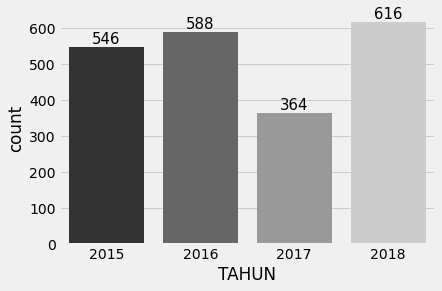

In [38]:
fig = sns.countplot(data_eval.TAHUN,palette='gray')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')
plt.show()

SEMESTER 

In [39]:
data_eval.SEMESTER.unique() # semester terbagi menjadi 4 digit, 2 digit terdepan menandakan tahun 1 digit berikutnya menandakan semester ganjil genap

array([1511, 1521, 1611, 1621, 1711, 1721, 1811, 1821], dtype=int64)

c:\Users\alrav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



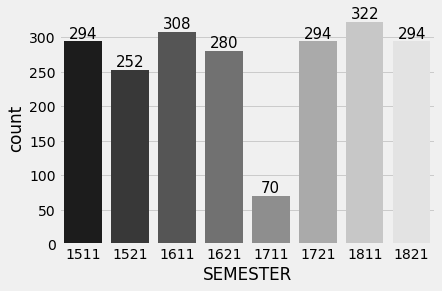

In [40]:
fig = sns.countplot(data_eval.SEMESTER,palette='gray')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')
plt.show()

MATAKULIAH

In [41]:
data_eval.MATAKULIAH.nunique() # terdapat 51 MataKuliah

51

In [42]:
data_eval.MATAKULIAH.value_counts().describe() # paling banyak jumlah matakuliah ada 98, paling kecil ada 14 jumlah suatu matkul

count    51.000000
mean     41.450980
std      19.791224
min      14.000000
25%      28.000000
50%      42.000000
75%      56.000000
max      98.000000
Name: MATAKULIAH, dtype: float64

NILAI

In [43]:
data_eval.NILAI.describe() # max nilai 4 minimal nilai 2 rata2 3,3

count    2114.000000
mean        3.308955
std         0.269830
min         2.000000
25%         3.170000
50%         3.320000
75%         3.450000
max         4.000000
Name: NILAI, dtype: float64

#### Bivariat Analysis

In [44]:
data_eval.groupby(['TAHUN']).MATAKULIAH.nunique() # pada setiap tahunnya terdapat perbedaan matakuliah

TAHUN
2015    34
2016    39
2017    26
2018    40
Name: MATAKULIAH, dtype: int64

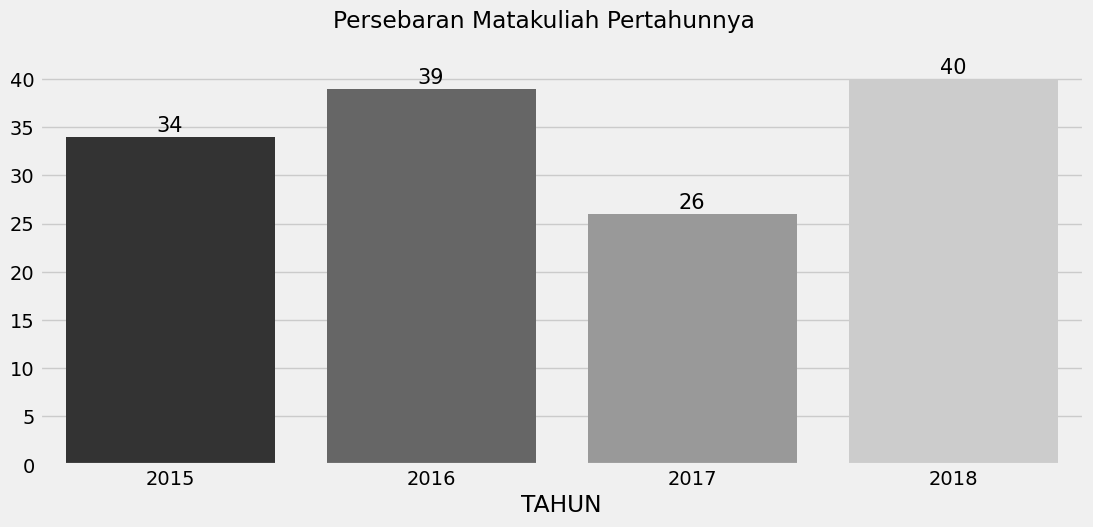

In [45]:
plt.figure(figsize=(12,5),dpi=100)
fig = sns.barplot(x=data_eval.groupby(['TAHUN']).MATAKULIAH.nunique().index,y=data_eval.groupby(['TAHUN']).MATAKULIAH.nunique().values,palette='gray')
plt.suptitle('Persebaran Matakuliah Pertahunnya')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')
plt.show()

In [46]:
data_eval.groupby(['SEMESTER']).MATAKULIAH.nunique() # pada setiap Semesternya x matakuliah

SEMESTER
1511    21
1521    18
1611    22
1621    20
1711     5
1721    21
1811    23
1821    21
Name: MATAKULIAH, dtype: int64

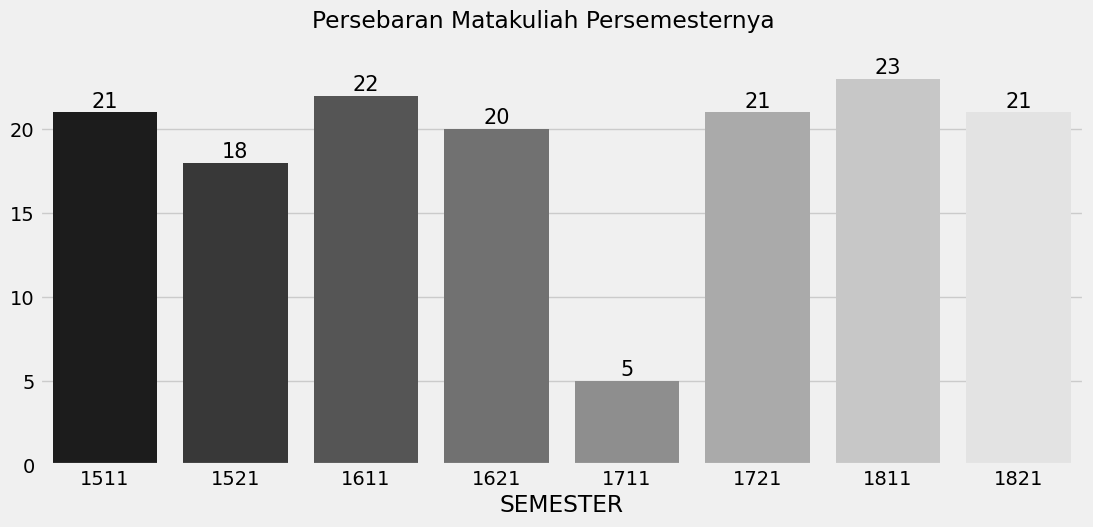

In [47]:
plt.figure(figsize=(12,5),dpi=100)
fig = sns.barplot(x=data_eval.groupby(['SEMESTER']).MATAKULIAH.nunique().index,y=data_eval.groupby(['SEMESTER']).MATAKULIAH.nunique().values,palette='gray')
plt.suptitle('Persebaran Matakuliah Persemesternya')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')
plt.show()

setiap semesternya memiliki jumlah matakuliah yang beda-beda dan pada semester 1711 hanya terdapat 5 matakuliah saja (?)

In [48]:
data_eval[data_eval.SEMESTER == 1711].MATAKULIAH.unique() # YEP, cmn ada 5 doang

array(['IS100 Management Information Systems',
       'IS110 Business Mathematics', 'IS544 Advanced Database',
       'IS580 Enterprise Application and Systems 1',
       'IS782 Enterprise Application and Systems 3'], dtype=object)

In [49]:
print(set(data_eval[data_eval.SEMESTER==1521].MATAKULIAH.unique()) - set(data_eval[data_eval.SEMESTER==1621].MATAKULIAH.unique()))
print(set(data_eval[data_eval.SEMESTER==1621].MATAKULIAH.unique())-set(data_eval[data_eval.SEMESTER==1521].MATAKULIAH.unique()))

{'IS513 E-Business', 'IS672 IT Governance 2'}
{'IS726 Innovation in Information and Technology', 'IS670 Information System Auditing', 'IS647 Data Mining', 'IS624 IS Advanced Topic'}


TERNYATA ADA MATAKULIAH YANG ADA DI TAHUN 15 GANJIL GENAP DAN ADA DI TAHUN 16 17 GENAP 

ADA MATKUL YANG ADA DI TAHUN 15 GANJIL GENAP DAN ADA DI TAHUN 16 17 18 GENAP

In [50]:
data_eval.groupby('MATAKULIAH').PERTANYAAN.nunique() # semua matakuliah memiliki 14 pertanyaan sama rata

MATAKULIAH
IS100 Management Information Systems                       14
IS110 Business Mathematics                                 14
IS155 Introduction to System and Information Technology    14
IS201 Corporate Business Processes                         14
IS220 Human and Computer Interaction                       14
IS228 Supply Chain Management                              14
IS230 Algorithms and Programming                           14
IS240 Probability and Statistic                            14
IS250 Business Ethics and Law                              14
IS251 Organizational Behavior                              14
IS255 Algorithm and Data Structure                         14
IS302 Operating Systems Concept                            14
IS321 Information Systems Analysis and Design              14
IS341 Database Systems                                     14
IS355 Operating System Concept                             14
IS388 Data Analysis                                        

KARENA ADA BEBERAPA MATAKULIAH YANG ADA PADA TAHUN TERTENTU BAIK ITU GANJIL DAN GENAP MAKA NILAI DARI MATAKULIAH AKAN DIBAGI BERDASARKAN TAHUN DAN PADA TAHUN PUN JUMLAH MATAKULIAH BERBEDA-BEDA

In [51]:
data_eval.groupby(['TAHUN']).NILAI.mean() 

TAHUN
2015    3.269231
2016    3.267432
2017    3.363956
2018    3.351299
Name: NILAI, dtype: float64

In [52]:
import plotly.io as pio

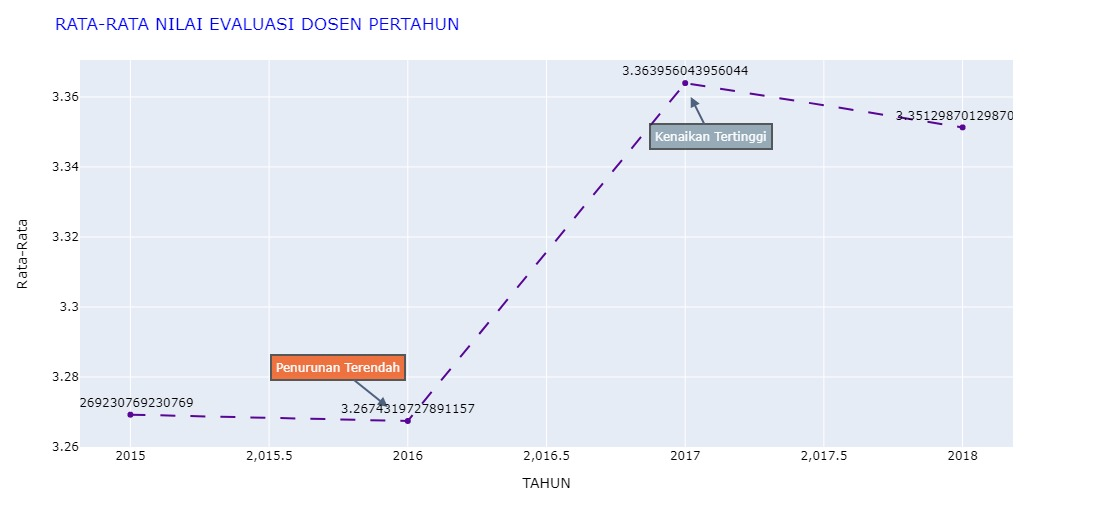

In [53]:

fig = px.line(x=data_eval.groupby(['TAHUN']).NILAI.mean().index,y=data_eval.groupby(['TAHUN']).NILAI.mean().values,markers=True,text=data_eval.groupby(['TAHUN']).NILAI.mean().values,line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI EVALUASI DOSEN PERTAHUN',
    title_font_color="blue",
    xaxis_title="TAHUN",
    yaxis_title="Rata-Rata",
    font_color="black",
)
fig.add_annotation(x=2017.02, y=3.36,
            text="Kenaikan Tertinggi",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=0,
            ax=20,
            ay=40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#839AA8",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x=2016, y=3.26,
            text="Penurunan Terendah",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=40,
            xshift=-20,
            ax=-50,
            ay=-40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

pio.write_image(fig, 'RATA-RATA NILAI EVALUASI DOSEN PERTAHUN.png', width=1093, height=527)
# fig.write_image("RATA-RATA NILAI EVALUASI DOSEN PERTAHUN.png",width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

pada 2015 menuju 2016 mengalami sedikit penurunan lalu pada 2017 mengalami kenaikan yang besar dan pada 2018 mengalami penurunan

In [54]:
data_eval.groupby(['SEMESTER']).NILAI.mean() 

SEMESTER
1511    3.294898
1521    3.239286
1611    3.253052
1621    3.283250
1711    3.405143
1721    3.354150
1811    3.353727
1821    3.348639
Name: NILAI, dtype: float64

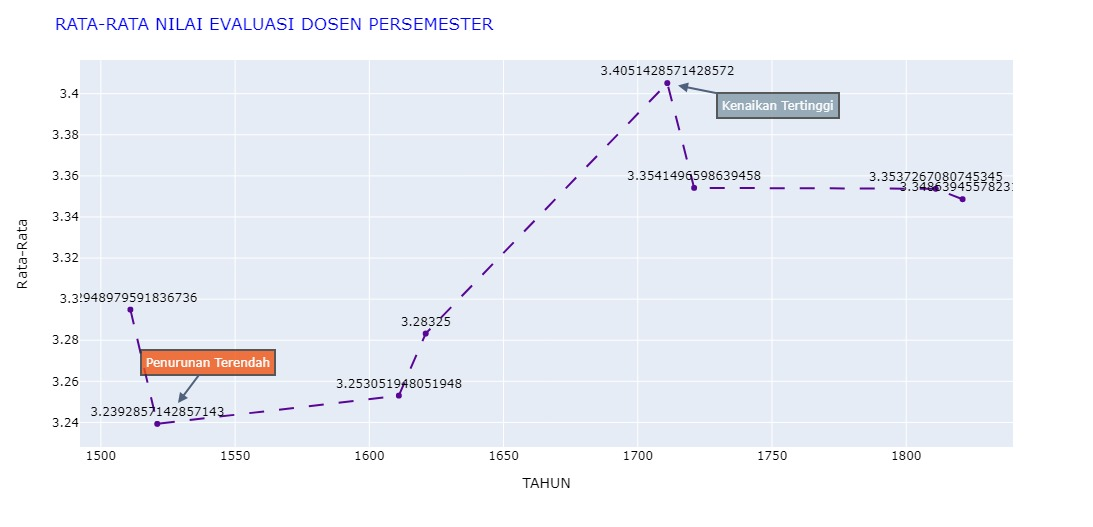

In [55]:
fig = px.line(x=data_eval.groupby(['SEMESTER']).NILAI.mean().index,y=data_eval.groupby(['SEMESTER']).NILAI.mean().values,markers='O',text=data_eval.groupby(['SEMESTER']).NILAI.mean().values,line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI EVALUASI DOSEN PERSEMESTER',
    title_font_color="blue",
    xaxis_title="TAHUN",
    yaxis_title="Rata-Rata",
    font_color="black",
)
fig.add_annotation(x=1715, y=3.404,
            text="Kenaikan Tertinggi",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=0,
            ax=100,
            ay=20,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#839AA8",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x=1525, y=3.23,
            text="Penurunan Terendah",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=40,
            xshift=10,
            ax=30,
            ay=-40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

pio.write_image(fig, 'RATA-RATA NILAI EVALUASI DOSEN PERSEMESTER.png', width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

1511 1521 1611 1621 1711 1721 1811 1821

#### Features Engineering

In [56]:
data_eval.MATAKULIAH = data_eval.MATAKULIAH.apply(lambda x: x.split()[0]) # ambil kode matkulnya saja

### Exploratory Data Analysis Pada Data Transript Mahasiswa

In [57]:
data.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


#### Univariat Analysis

**NIM**

In [59]:
# Pada data ini terdapat nim yang sama berarti attribute atau nilai-nilai dari mahasiswa ini tersebar secara terpisah
data.NIM.nunique() # sehingga terdapat 770 mahasiswa

770

**ANGKATAN**

In [60]:
data.ANGKATAN.unique() # hanya terdapat angkatan 2010 hingga 2018

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

**SEMESTER**

In [61]:
data.SEMESTER.unique() # 2 digit terdepan mendefinisikan tahun, 1 digit berikutnya menjelaskan semester ganjil atau genap

array([1011, 1021, 1111, 1121, 1211, 1221, 1311, 1321, 1322, 1122, 1222,
       1411, 1421, 1022, 1422, 1511, 1621, 1521, 1611, 1711, 1721, 1722,
       1522, 1821, 1811, 1622, 1822, 1911], dtype=int64)

**KODE_MK**

In [62]:
data.KODE_MK.nunique() # Terdapat 142 matkul

142

In [63]:
data[data.ANGKATAN==2013].groupby('NIM').KODE_MK.apply(lambda x: ' '.join(x)).values[:5]

array(['EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 CE441 EM604 IS220 IS321 IS341 IS534 IS726 EA100 IF635 IS403 IS422 IS512 IS580 EA201 EA410 IS513 IS623 IS652 IS660 IS681 IS543 IS670 IS725 IS782 IS761 IS853 IS862',
       'EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 CE441 EM604 IS220 IS321 IS341 IS534 IS726 EA100 IF635 IS403 IS422 IS512 IS543 IS544 EA201 EA410 IS513 IS623 IS645 IS652 IS660 IS670 IS725 IS747 IS853 IS761 IS862',
       'EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 CE441 EM604 IS220 IS321 IS341 IS534 IS726 EA100 IF635 IS403 IS422 IS512 IS543 IS544 EA201 EA410 IS513 IS623 IS645 IS652 IS660 IS670 IS725 IS747 IS853 IS761 IS862',
       'EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI

In [64]:
data[data.ANGKATAN==2014].groupby('NIM').KODE_MK.apply(lambda x: ' '.join(x)).values[:5]

array(['EM190 IF110 IF140 IS100 IS110 UM122 UM152 UM162 IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM142 UM223 CE441 EA100 IS302 IS321 IS341 IS512 EM604 IS403 IS422 IS431 IS432 IS442 EA410 IF635 IS513 IS543 IS571 IS725 IS623 IS624 IS652 IS670 IS672 UM321 IS342 IS534 IS726 IS727 IS773 IS228 IS660 IS853 SI863 UM163',
       'EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM152 UM162 IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM142 UM223 CE441 EA100 IS302 IS321 IS341 IS512 UM163 EA201 EM604 IS403 IS422 IS431 IS432 IS442 IS652 EA410 IF635 IS513 IS534 IS543 IS545 IS725 IS727 IS623 IS624 IS647 IS660 IS670 IS726 UM321 IS749 IS761 IS853 IS862',
       'EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM152 UM162 IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM142 UM223 CE441 EA100 IS302 IS321 IS341 IS512 UM163 EA201 EM604 IS403 IS422 IS431 IS432 IS442 EA410 IF635 IS513 IS534 IS543 IS544 IS727 IS623 IS624 IS645 IS652 IS660 IS670 UM321 IS725 IS726 IS747 IS761 IS853 IS862',
       'EM190 EM372 IF110 IF140 IS100 IS

In [65]:
data[data.NAMA_MK=='Matematika Bisnis'].KODE_MK.unique() # terdapat 2 kode matematika bisnis, untuk 2014 kebawah EM180 dan untuk 2014 keatas IS110

array(['EM180', 'IS110'], dtype=object)

In [66]:
data[data.NAMA_MK=='Bahasa Inggris 1'].KODE_MK.unique()

array(['UM121', 'UM122'], dtype=object)

In [67]:
data[data.NAMA_MK=='Pengantar Teknologi Multimedia'].KODE_MK.unique()

array(['TI110', 'IF110'], dtype=object)

mungkin terdapat perubahan silabus pada matkul tertentu yang mengakibatkan perbedaan kode matakuliah

**SKS**

In [68]:
pd.DataFrame(data.groupby('NIM').SKS.sum().describe()).T # Kami menemukan Anomali pada SKS yaitu terdapat mahasiswa yang menyelesaikan 290 sks

,count,mean,std,min,25%,50%,75%,max
SKS,770.0,113.780519,48.195553,40.0,82.0,134.0,145.0,290.0


In [69]:
data.groupby('NIM').SKS.sum().idxmax() #kita ambil sample mahasiswa tersebut

10110310011

In [70]:
data[data.NIM==10110310011] # ternyata terdapat duplikasi kode_mk yang mengakibatkan nilai SKS meningkat

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
345,10110310011,2010,1011,EM100,Dasar-dasar Bisnis,3,71.0,B
346,10110310011,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,74.0,B
347,10110310011,2010,1011,EM180,EM180 Matematika Bisnis,3,73.0,B
348,10110310011,2010,1011,EM180,Matematika Bisnis,3,74.0,B
349,10110310011,2010,1011,TI100,Algoritma dan Pemrograman,4,72.0,B
...,...,...,...,...,...,...,...,...
438,10110310011,2010,1311,SI745,SI745 Pengembangan Aplikasi Database 2,3,92.0,A
439,10110310011,2010,1411,SI860,Magang Kerja,4,84.0,A-
440,10110310011,2010,1411,SI860,SI860 Magang Kerja,4,81.0,A-
441,10110310011,2010,1411,SI863,SI863 Tugas Akhir,6,71.0,B


In [71]:
data = data.drop_duplicates(['NIM','KODE_MK'],keep='last') # drop duplicates
data.groupby('NIM').SKS.sum().max() # max sks yang diambil mahasiswa menjadi 148

148

In [72]:
pd.DataFrame(data.groupby('NIM').SKS.sum().describe()).T # SKS menjadi normal

,count,mean,std,min,25%,50%,75%,max
SKS,770.0,110.763636,41.083773,40.0,82.0,134.0,145.0,148.0


**GRADE**

In [73]:
data.GRADE.unique() # GRADE pada Mahasiswa

array(['C', 'B', nan, 'A', 'D', 'A-', 'B+', 'B-', 'C+', 'E', 'F'],
      dtype=object)

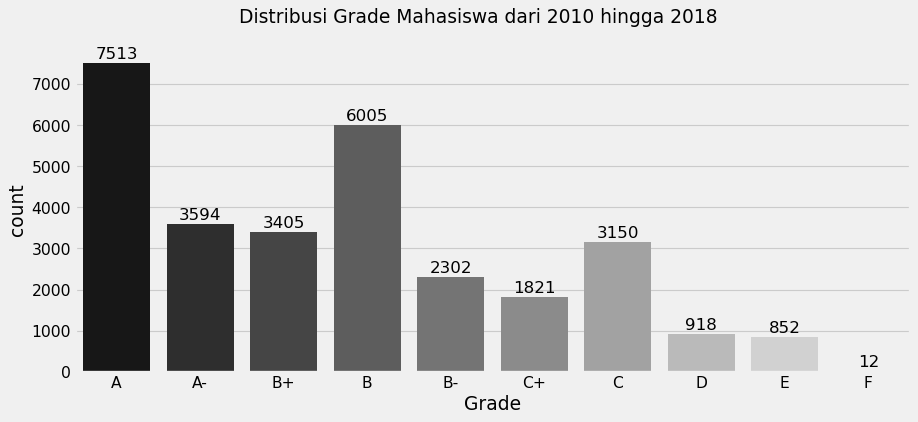

In [74]:
plt.figure(figsize=(12,5),dpi=80)
fig = sns.countplot(x=data['GRADE'],palette='gray',order=['A','A-','B+','B','B-','C+','C','D','E','F'])
plt.suptitle('Distribusi Grade Mahasiswa dari 2010 hingga 2018')
plt.xlabel('Grade')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')

#### Bivariat Analysis

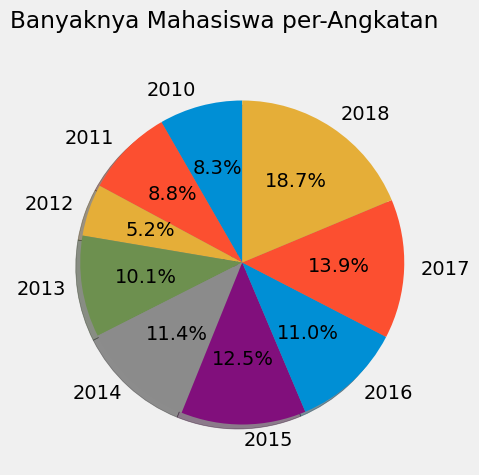

In [75]:
plt.figure(figsize=(12,5),dpi=100)
plt.suptitle('Banyaknya Mahasiswa per-Angkatan')
plt.pie(data.groupby('NIM').ANGKATAN.mean().value_counts().sort_index(),labels=data.groupby('NIM').ANGKATAN.mean().value_counts().sort_index().index.astype('int32'),autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

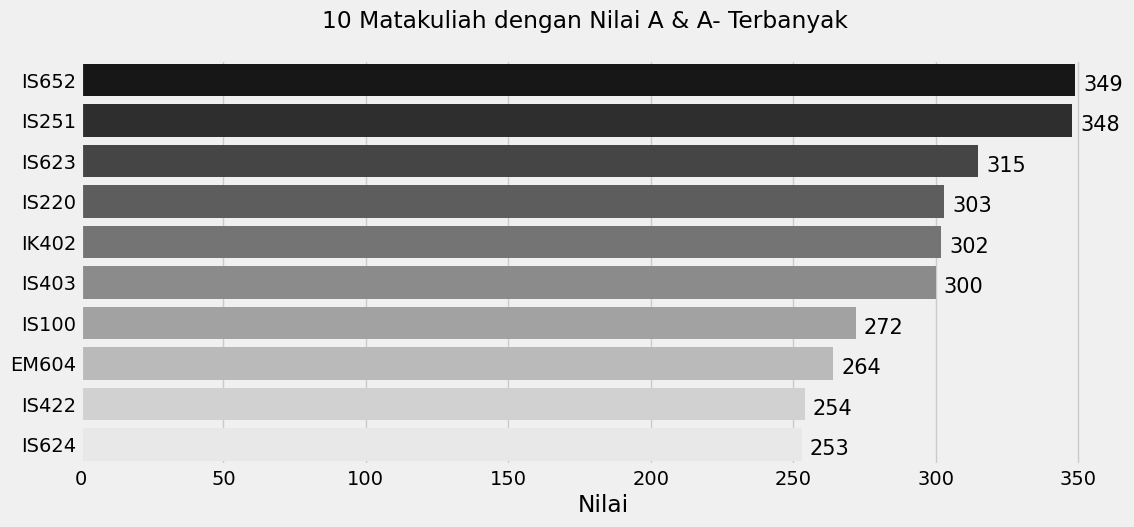

In [76]:
plt.figure(figsize=(12,5),dpi=100)
fig = sns.barplot(y=data[(data.GRADE == 'A')|(data.GRADE == 'A-')].groupby('KODE_MK').GRADE.count().sort_values(ascending=False).head(10).index,x=data[(data.GRADE == 'A')|(data.GRADE == 'A-')].groupby('KODE_MK').GRADE.count().sort_values(ascending=False).head(10).values,palette='gray')
plt.suptitle('10 Matakuliah dengan Nilai A & A- Terbanyak')
plt.xlabel('Nilai')
plt.ylabel('')
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=15, xytext=(20, -15),
                   textcoords='offset points',color='Black')

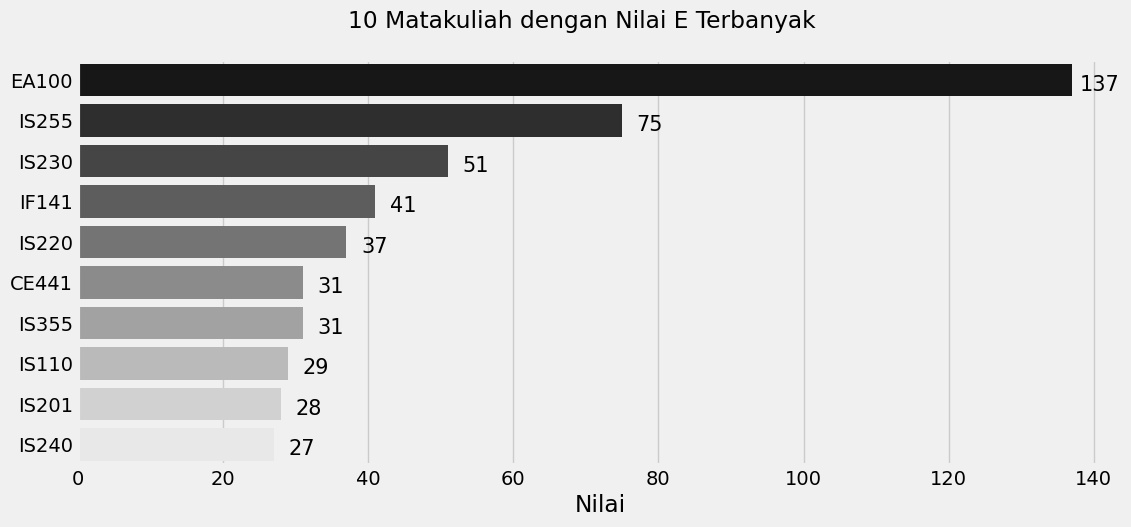

In [77]:
plt.figure(figsize=(12,5),dpi=100)
fig = sns.barplot(y=data[(data.GRADE == 'E')].groupby('KODE_MK').GRADE.count().sort_values(ascending=False).head(10).index,x=data[(data.GRADE == 'E')].groupby('KODE_MK').GRADE.count().sort_values(ascending=False).head(10).values,palette='gray')
plt.suptitle('10 Matakuliah dengan Nilai E Terbanyak')
plt.xlabel('Nilai')
plt.ylabel('')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=15, xytext=(20, -15),
                   textcoords='offset points',color='Black')

#### Multivariate Analysis

Text(0, 0.5, '')

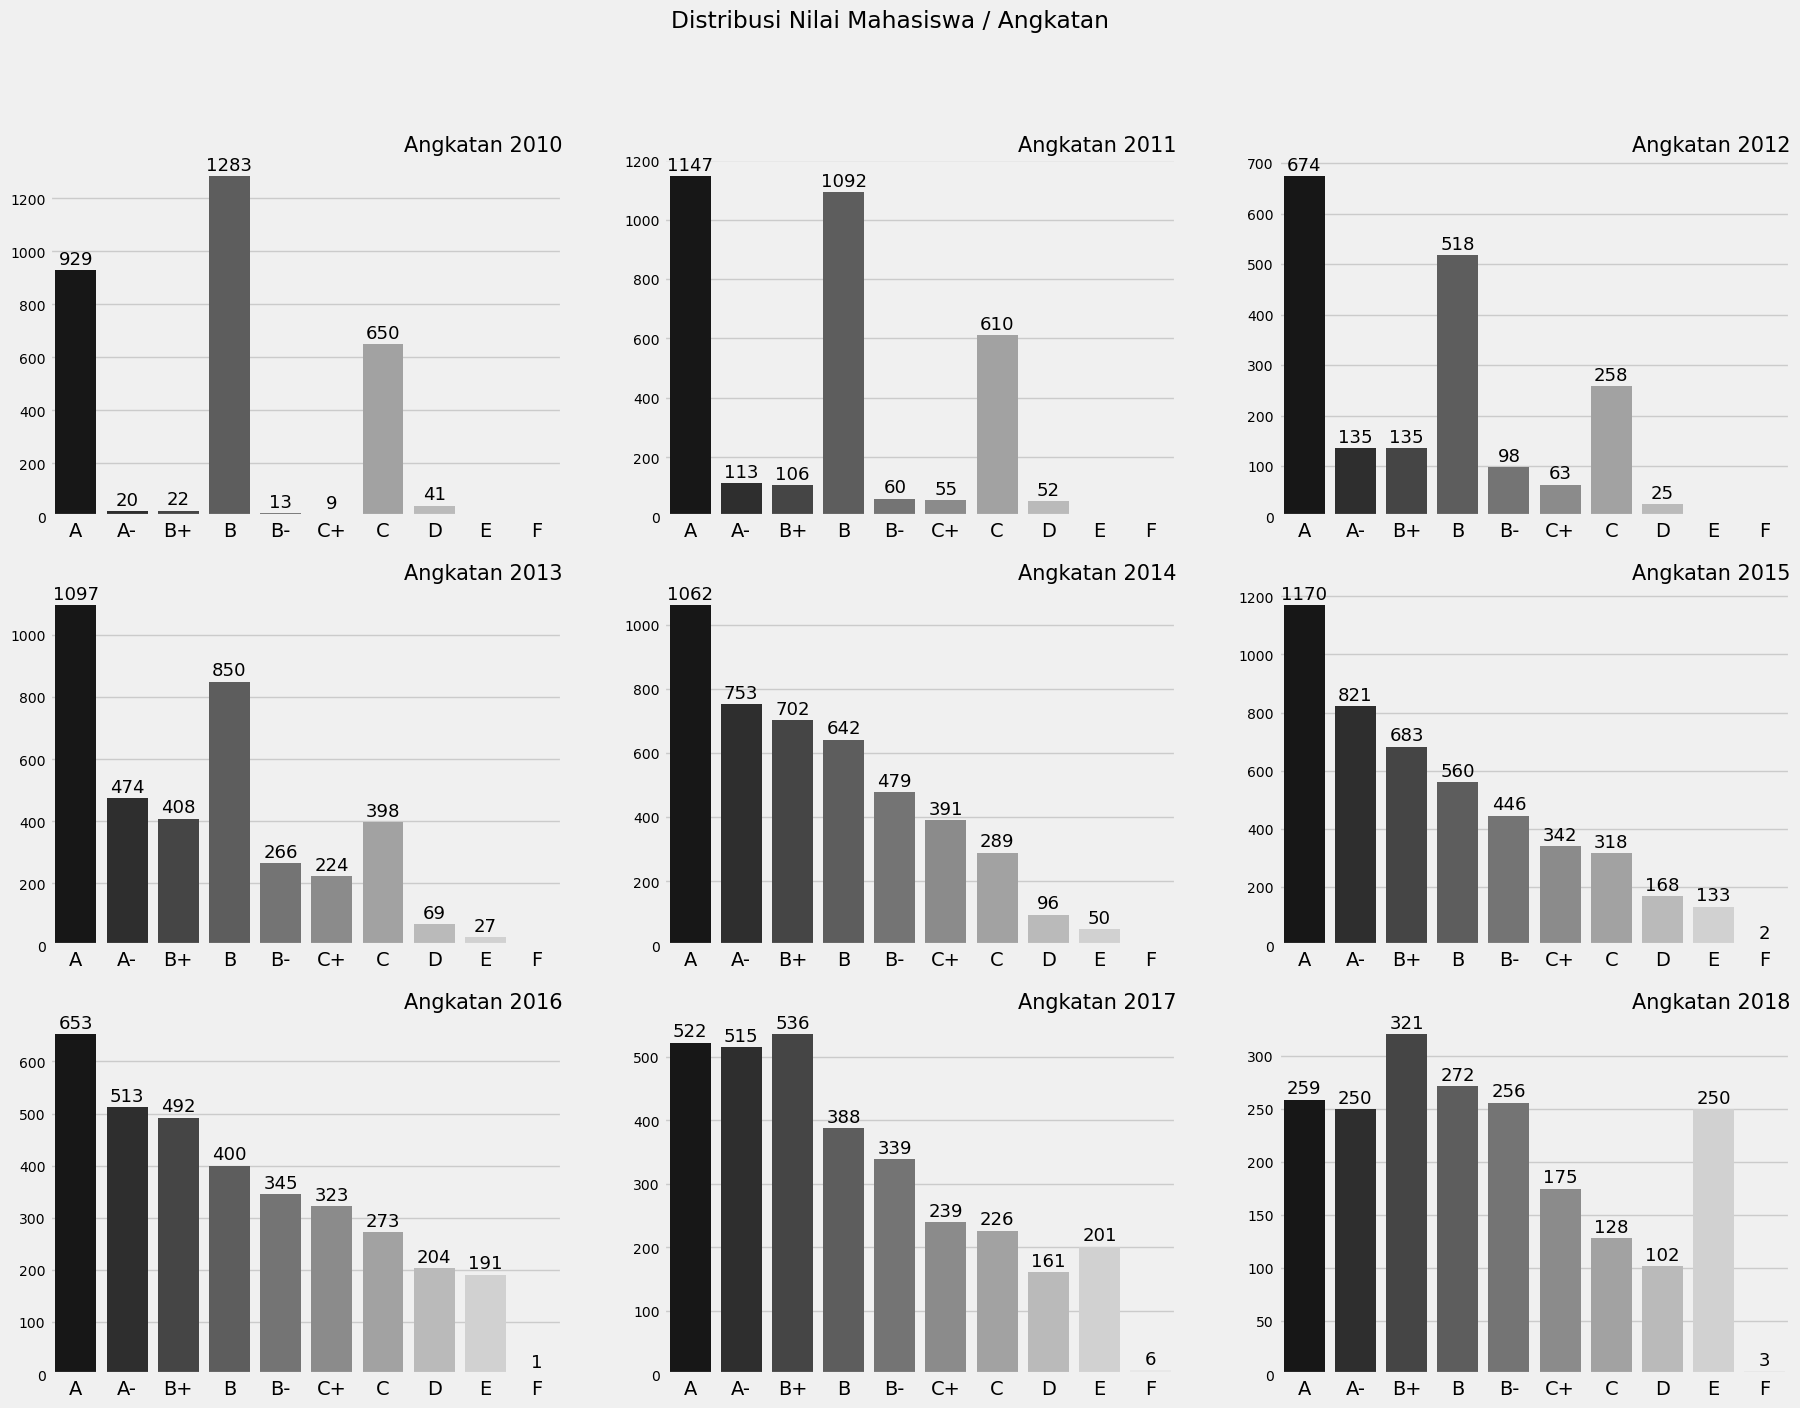

In [78]:

ordered = ['A','A-','B+','B','B-','C+','C','D','E','F']
fig,ax = plt.subplots(3,3,figsize=(20,15),dpi=100)
fig = sns.countplot(x=data.loc[data.ANGKATAN==2010,'GRADE'],ax=ax[0,0],palette='gray',order=ordered,label=['Angkatan 2010'])
plt.suptitle('Distribusi Nilai Mahasiswa / Angkatan')
plt.xlabel('Nilai')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2011,'GRADE'],ax=ax[0,1],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2012,'GRADE'],ax=ax[0,2],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2013,'GRADE'],ax=ax[1,0],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2014,'GRADE'],ax=ax[1,1],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2015,'GRADE'],ax=ax[1,2],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2016,'GRADE'],ax=ax[2,0],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2017,'GRADE'],ax=ax[2,1],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')
    
fig = sns.countplot(x=data.loc[data.ANGKATAN==2018,'GRADE'],ax=ax[2,2],palette='gray',order=ordered)
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=13, xytext=(0, 8),
                   textcoords='offset points',color='Black')

ax[0,0].tick_params(axis='y', which='major', labelsize=10)
ax[0,1].tick_params(axis='y', which='major', labelsize=10)
ax[0,2].tick_params(axis='y', which='major', labelsize=10)
ax[1,0].tick_params(axis='y', which='major', labelsize=10)
ax[1,1].tick_params(axis='y', which='major', labelsize=10)
ax[1,2].tick_params(axis='y', which='major', labelsize=10)
ax[2,0].tick_params(axis='y', which='major', labelsize=10)
ax[2,1].tick_params(axis='y', which='major', labelsize=10)
ax[2,2].tick_params(axis='y', which='major', labelsize=10)

ax[0,0].set_xlabel(''); ax[0,0].set_title('Angkatan 2010', loc='right',fontsize=15);ax[0,0].set_ylabel('')
ax[0,1].set_xlabel(''); ax[0,1].set_title('Angkatan 2011', loc='right',fontsize=15);ax[0,1].set_ylabel('')
ax[0,2].set_xlabel(''); ax[0,2].set_title('Angkatan 2012', loc='right',fontsize=15);ax[0,2].set_ylabel('')
ax[1,0].set_xlabel(''); ax[1,0].set_title('Angkatan 2013', loc='right',fontsize=15);ax[1,0].set_ylabel('')
ax[1,1].set_xlabel(''); ax[1,1].set_title('Angkatan 2014', loc='right',fontsize=15);ax[1,1].set_ylabel('')
ax[1,2].set_xlabel(''); ax[1,2].set_title('Angkatan 2015', loc='right',fontsize=15);ax[1,2].set_ylabel('')
ax[2,0].set_xlabel(''); ax[2,0].set_title('Angkatan 2016', loc='right',fontsize=15);ax[2,0].set_ylabel('')
ax[2,1].set_xlabel(''); ax[2,1].set_title('Angkatan 2017', loc='right',fontsize=15);ax[2,1].set_ylabel('')
ax[2,2].set_xlabel(''); ax[2,2].set_title('Angkatan 2018', loc='right',fontsize=15);ax[2,2].set_ylabel('')

In [79]:
#init dataframe
data_misal = data[(data.GRADE == 'A')|(data.GRADE == 'A+')]
df_agg_misal = data_misal.groupby(['ANGKATAN','KODE_MK']).agg({'GRADE':'count'})
g = df_agg_misal['GRADE'].groupby('ANGKATAN', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(10))
res = res.reset_index()

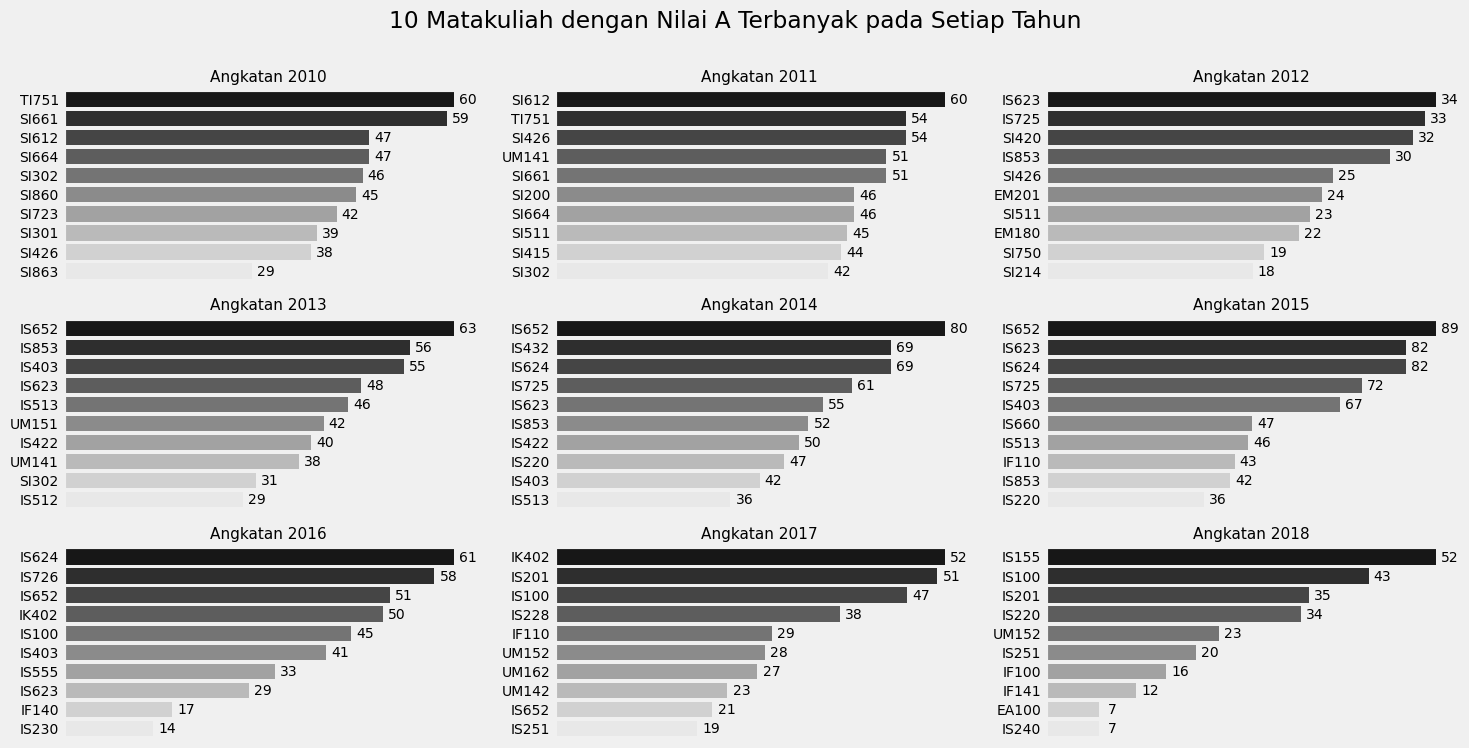

In [80]:
fig,ax = plt.subplots(3,3,figsize=(16,8),dpi=100)
fig = sns.barplot(data=res[res.ANGKATAN==2010],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,0])
plt.suptitle('10 Matakuliah dengan Nilai A Terbanyak pada Setiap Tahun')
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2011],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2012],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2013],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,0])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2014],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2015],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2016],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,0])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2017],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2018],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    

ax[0,0].tick_params(axis='y', which='major', labelsize=10)
ax[0,1].tick_params(axis='y', which='major', labelsize=10)
ax[0,2].tick_params(axis='y', which='major', labelsize=10)
ax[1,0].tick_params(axis='y', which='major', labelsize=10)
ax[1,1].tick_params(axis='y', which='major', labelsize=10)
ax[1,2].tick_params(axis='y', which='major', labelsize=10)
ax[2,0].tick_params(axis='y', which='major', labelsize=10)
ax[2,1].tick_params(axis='y', which='major', labelsize=10)
ax[2,2].tick_params(axis='y', which='major', labelsize=10)

ax[0,0].set_xticks([])
ax[0,0].set_xlabel(''); ax[0,0].set_title('Angkatan 2010', loc='center',fontsize=11);ax[0,0].set_ylabel('')
ax[0,1].set_xticks([])
ax[0,1].set_xlabel(''); ax[0,1].set_title('Angkatan 2011', loc='center',fontsize=11);ax[0,1].set_ylabel('')
ax[0,2].set_xticks([])
ax[0,2].set_xlabel(''); ax[0,2].set_title('Angkatan 2012', loc='center',fontsize=11);ax[0,2].set_ylabel('')
ax[1,0].set_xticks([])
ax[1,0].set_xlabel(''); ax[1,0].set_title('Angkatan 2013', loc='center',fontsize=11);ax[1,0].set_ylabel('')
ax[1,1].set_xticks([])
ax[1,1].set_xlabel(''); ax[1,1].set_title('Angkatan 2014', loc='center',fontsize=11);ax[1,1].set_ylabel('')
ax[1,2].set_xticks([])
ax[1,2].set_xlabel(''); ax[1,2].set_title('Angkatan 2015', loc='center',fontsize=11);ax[1,2].set_ylabel('')
ax[2,0].set_xticks([])
ax[2,0].set_xlabel(''); ax[2,0].set_title('Angkatan 2016', loc='center',fontsize=11);ax[2,0].set_ylabel('')
ax[2,1].set_xticks([])
ax[2,1].set_xlabel(''); ax[2,1].set_title('Angkatan 2017', loc='center',fontsize=11);ax[2,1].set_ylabel('')
ax[2,2].set_xticks([])
ax[2,2].set_xlabel(''); ax[2,2].set_title('Angkatan 2018', loc='center',fontsize=11);ax[2,2].set_ylabel('')

plt.show()

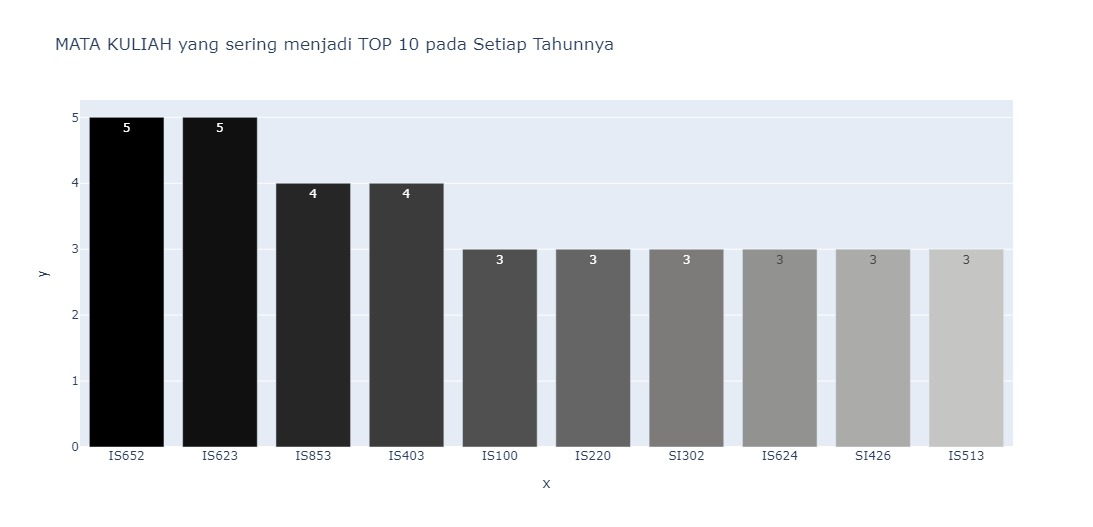

In [81]:
fig = px.bar(x=res.reset_index().KODE_MK.value_counts().head(10).index,y=res.reset_index().KODE_MK.value_counts().head(10).values,title='MATA KULIAH yang sering menjadi TOP 10 pada Setiap Tahunnya',text_auto=True,color_discrete_sequence=[px.colors.sequential.gray])

pio.write_image(fig, 'MATA KULIAH yang sering menjadi TOP 10 pada Setiap Tahunnya.png', width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

In [82]:
#init dataframe
data_misal = data[(data.GRADE == 'E')|(data.GRADE == 'D')]
df_agg_misal = data_misal.groupby(['ANGKATAN','KODE_MK']).agg({'GRADE':'count'})
g = df_agg_misal['GRADE'].groupby('ANGKATAN', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(10))
res = res.reset_index()

In [83]:
res

,ANGKATAN,KODE_MK,GRADE
0,2010,TI100,7
1,2010,EA100,5
2,2010,EM100,4
3,2010,SI521,3
4,2010,TI532,3
...,...,...,...
85,2018,IS201,16
86,2018,IS220,15
87,2018,IF141,14
88,2018,IS155,11


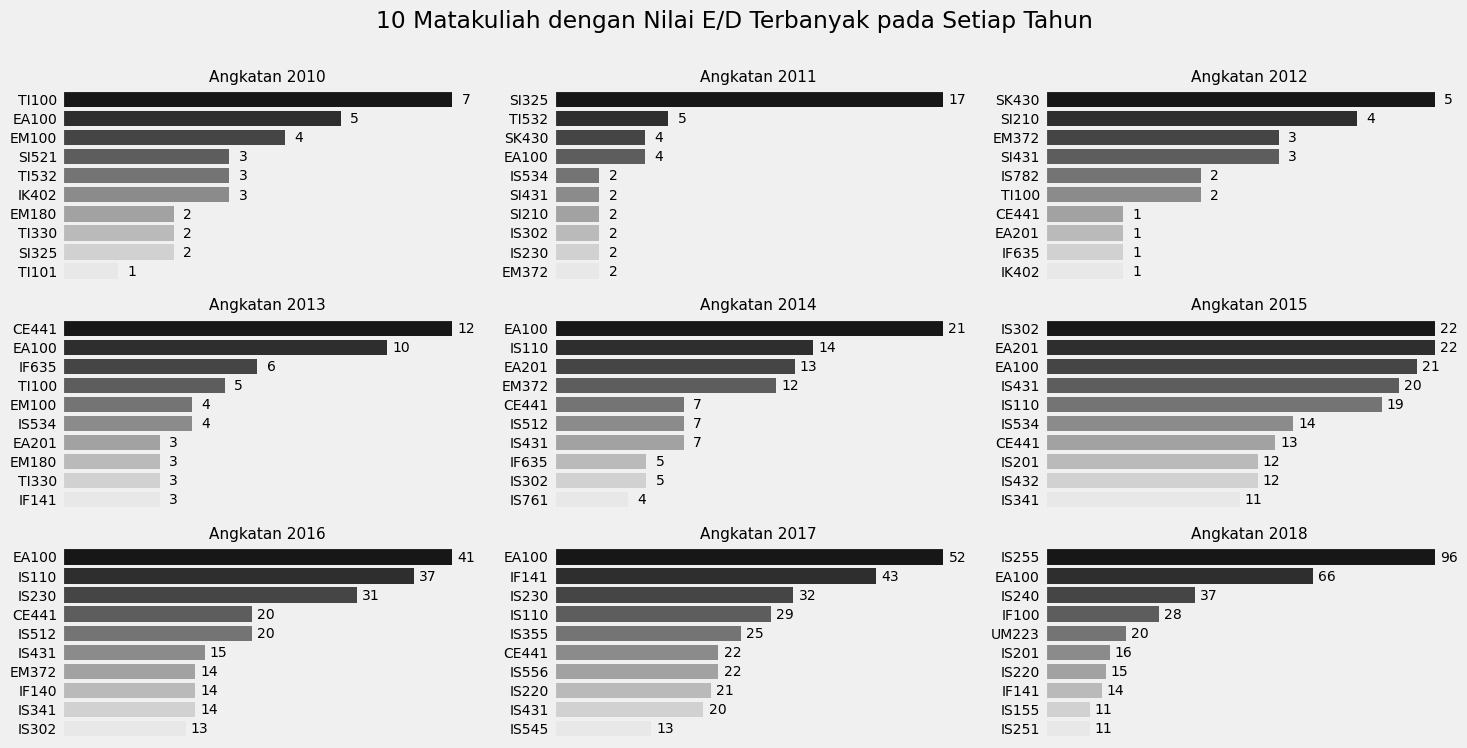

In [84]:
fig,ax = plt.subplots(3,3,figsize=(16,8),dpi=100)
fig = sns.barplot(data=res[res.ANGKATAN==2010],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,0])
plt.suptitle('10 Matakuliah dengan Nilai E/D Terbanyak pada Setiap Tahun')
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2011],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2012],y='KODE_MK',x='GRADE',palette='gray',ax=ax[0,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2013],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,0])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2014],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2015],y='KODE_MK',x='GRADE',palette='gray',ax=ax[1,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2016],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,0])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2017],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,1])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    
fig = sns.barplot(data=res[res.ANGKATAN==2018],y='KODE_MK',x='GRADE',palette='gray',ax=ax[2,2])
    
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_width(),
                 (bar.get_width(),bar.get_y())
                 ,va='center',ha='center',size=10, xytext=(10, -6),
                   textcoords='offset points',color='Black')
    

ax[0,0].tick_params(axis='y', which='major', labelsize=10)
ax[0,1].tick_params(axis='y', which='major', labelsize=10)
ax[0,2].tick_params(axis='y', which='major', labelsize=10)
ax[1,0].tick_params(axis='y', which='major', labelsize=10)
ax[1,1].tick_params(axis='y', which='major', labelsize=10)
ax[1,2].tick_params(axis='y', which='major', labelsize=10)
ax[2,0].tick_params(axis='y', which='major', labelsize=10)
ax[2,1].tick_params(axis='y', which='major', labelsize=10)
ax[2,2].tick_params(axis='y', which='major', labelsize=10)

ax[0,0].set_xticks([])
ax[0,0].set_xlabel(''); ax[0,0].set_title('Angkatan 2010', loc='center',fontsize=11);ax[0,0].set_ylabel('')
ax[0,1].set_xticks([])
ax[0,1].set_xlabel(''); ax[0,1].set_title('Angkatan 2011', loc='center',fontsize=11);ax[0,1].set_ylabel('')
ax[0,2].set_xticks([])
ax[0,2].set_xlabel(''); ax[0,2].set_title('Angkatan 2012', loc='center',fontsize=11);ax[0,2].set_ylabel('')
ax[1,0].set_xticks([])
ax[1,0].set_xlabel(''); ax[1,0].set_title('Angkatan 2013', loc='center',fontsize=11);ax[1,0].set_ylabel('')
ax[1,1].set_xticks([])
ax[1,1].set_xlabel(''); ax[1,1].set_title('Angkatan 2014', loc='center',fontsize=11);ax[1,1].set_ylabel('')
ax[1,2].set_xticks([])
ax[1,2].set_xlabel(''); ax[1,2].set_title('Angkatan 2015', loc='center',fontsize=11);ax[1,2].set_ylabel('')
ax[2,0].set_xticks([])
ax[2,0].set_xlabel(''); ax[2,0].set_title('Angkatan 2016', loc='center',fontsize=11);ax[2,0].set_ylabel('')
ax[2,1].set_xticks([])
ax[2,1].set_xlabel(''); ax[2,1].set_title('Angkatan 2017', loc='center',fontsize=11);ax[2,1].set_ylabel('')
ax[2,2].set_xticks([])
ax[2,2].set_xlabel(''); ax[2,2].set_title('Angkatan 2018', loc='center',fontsize=11);ax[2,2].set_ylabel('')

plt.show()

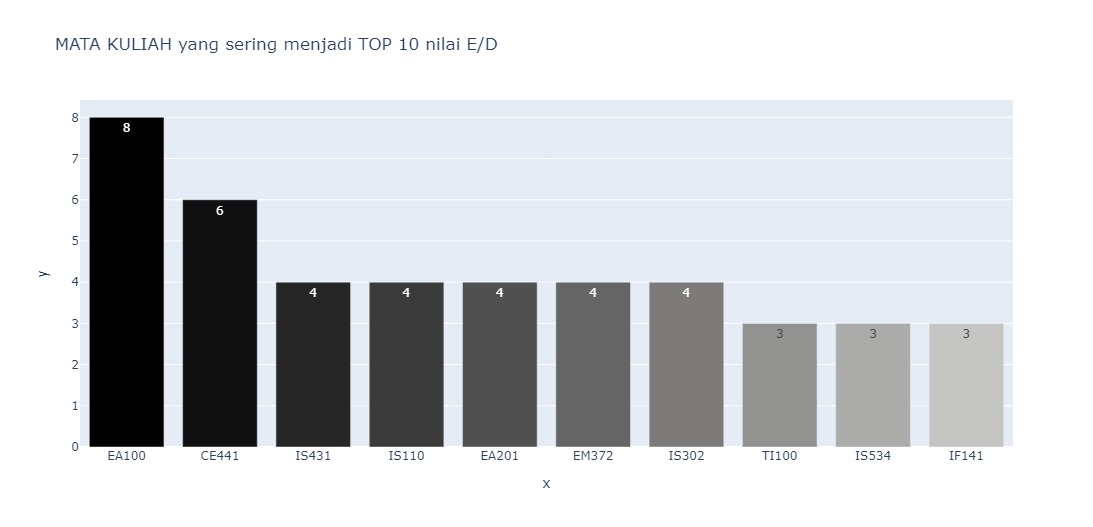

In [85]:
fig = px.bar(x=res.reset_index().KODE_MK.value_counts().head(10).index,y=res.reset_index().KODE_MK.value_counts().head(10).values,title='MATA KULIAH yang sering menjadi TOP 10 nilai E/D',text_auto=True,color_discrete_sequence=[px.colors.sequential.gray])
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

EA100 = Pengantar Akuntansi 1

CE441 = Jaringan Komputer

EM372 = Pengantar Ekonomi

IS431 = Pemrograman Visual

IS100 = Sistem Informasi Dalam Manajemen

IS302 = Konsep Sistem Operasi

IS534 = Pemrograman Aplikasi Mobile

**MELIHAT SECARA KESELURUHAN NILAI ANGKATAN TIAP TAHUNNYA**

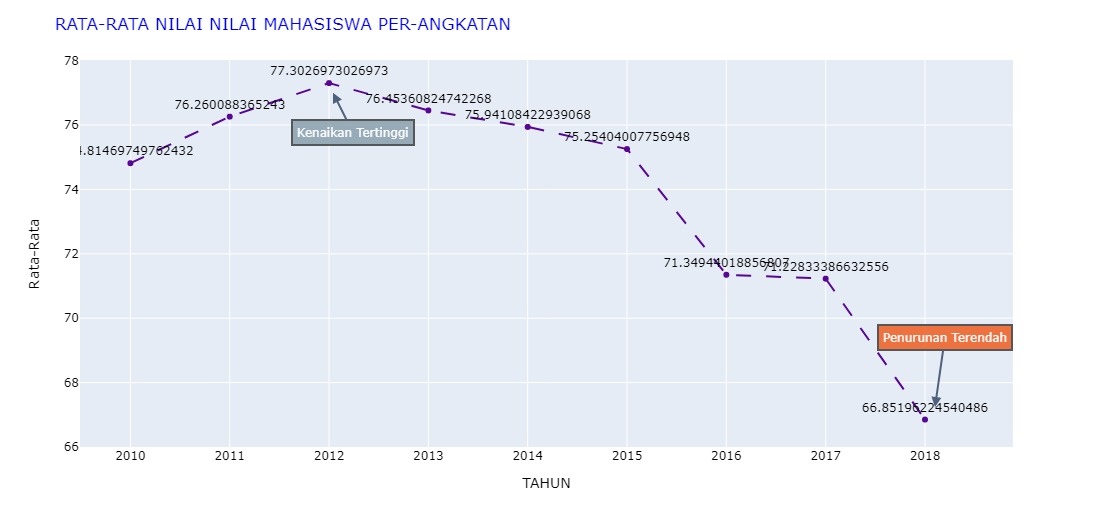

In [86]:
fig = px.line(data.groupby('ANGKATAN').NILAI.mean(),markers=True,text=data.groupby('ANGKATAN').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI NILAI MAHASISWA PER-ANGKATAN',
    title_font_color="blue",
    xaxis_title="TAHUN",
    yaxis_title="Rata-Rata",
    font_color="black",
    showlegend=False
)
fig.add_annotation(x=2012, y=77,
            text="Kenaikan Tertinggi",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=0,
            xshift=4,
            ax=20,
            ay=40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#839AA8",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x=2018, y=66,
            text="Penurunan Terendah",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=40,
            xshift=10,
            ax=10,
            ay=-70,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

pio.write_image(fig, 'RATA-RATA NILAI NILAI MAHASISWA PER-ANGKATAN.png', width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

In [87]:
# fig = px.line(data.groupby('SEMESTER').NILAI.mean(),markers=True,text=data.groupby('SEMESTER').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
# fig.update_traces(textposition='top center')
# fig.update_layout(
#     title='RATA-RATA NILAI NILAI MAHASISWA PER-SEMESTER',
#     title_font_color="blue",
#     xaxis_title="TAHUN",
#     yaxis_title="Rata-Rata",
#     font_color="black",
#     showlegend=False
# )
# fig.add_annotation(x=2012, y=77,
#             text="Kenaikan Tertinggi",
#             align="center",
#             arrowhead=2,
#             arrowsize=1,
#             arrowwidth=2,
#             yshift=0,
#             xshift=4,
#             ax=20,
#             ay=40,
#             bordercolor="#333",
#             borderwidth=2,
#             borderpad=4,
#             bgcolor="#839AA8",
#             opacity=0.8,
#             font_color="#fff")

# fig.add_annotation(x=2018, y=66,
#             text="Penurunan Terendah",
#             align="center",
#             arrowhead=2,
#             arrowsize=1,
#             arrowwidth=2,
#             yshift=40,
#             xshift=10,
#             ax=10,
#             ay=-70,
#             bordercolor="#333",
#             borderwidth=2,
#             borderpad=4,
#             bgcolor="#F15412",
#             opacity=0.8,
#             font_color="#fff")

# pio.write_image(fig, 'RATA-RATA NILAI NILAI MAHASISWA PER-SEMESTER.png', width=1093, height=527)
# fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

#### Dealing With Missing Values

In [88]:
data.isna().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       513
dtype: int64

ada 552 missing value di GRADE ya!

Missing di NAMA_MK bisa diisi sama KODE_MK (seharusnya bisa)

Missing di nilai seharusnya juga bisa diisi berdasarkan grade

sama kyk di grade juga 

	Numerik		Grade	Bobot Nilai
	85 - 100	A	4
	80 – 84.99	A-	3.7
	75 – 79.99	B+	3.3
	70 – 74.99	B	3.0
	65 - 69.99	B-	2.7
	60 – 64.99	C+	2.3
	55 – 59.99	C	2.0
	45 – 54.99	D	1.0
	 0 – 44.99	E	0
			F	0
(ada di Petunjuk Tambahan Pengerjaan)

bisa diisi asalkan kedua nilai dan grade ga missing bersamaan

In [89]:
data.loc[(data.GRADE.isna())&(data.NILAI.isna())] # Alhamdulillah gaada yg keduanya null

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE


In [90]:
data.loc[data.GRADE.isna(),'NIM'].value_counts() # Paling banyak missing nya sejumlah 14 pada mahasiswa ber-NIM 13110310019

13110310019    14
10110310006    13
10110310017     9
10110310018     7
10110310008     7
               ..
11110310078     1
10110310061     1
11110310091     1
12110310017     1
11110310039     1
Name: NIM, Length: 187, dtype: int64

**IMPUTE MISSING VALUE**

In [91]:
def impute_grade_based_on_nilai(nilai,grade):
    if pd.isna(nilai):
        return grade
    elif pd.notna(grade):
        return grade
    else:
        if nilai < 45:
            return 'E'
        elif nilai < 55:
            return 'D'
        elif nilai < 60:
            return 'D'
        elif nilai < 65:
            return 'C+'
        elif nilai < 70:
            return 'B-'
        elif nilai < 75:
            return 'B'
        elif nilai < 80:
            return 'B+'
        elif nilai < 85:
            return 'A-'
        elif nilai < 101:
            return 'A'

In [92]:
data.GRADE = data.apply(lambda x: impute_grade_based_on_nilai(x['NILAI'],x['GRADE']),axis=1)
data.isna().sum()

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI       12
GRADE        0
dtype: int64

### EDA Evaluasi DOSEN X Transcript Mahasiswa

UNTUK MELIHAT PENGARUH NILAI DOSEN TERHADAP KENAIKAN NILAI MAHASISWA MAKA DIBUTUHKAN DATAFRAME BARU

In [93]:
print(data.KODE_MK.nunique()) # Pada data terdapat 142 matakuliah
print(data_eval.MATAKULIAH.nunique()) # pada data_eval terdapat 51 matakuliah

142
51


**karena data_eval hanya ada pada angkatan 15 dan keatas maka kita akan mengambil data yang sama dengan matkul yang sama juga, sehingga dapat mengetahui apakah evaluasi dosen memiliki pengaruh pada dataset ini**

In [94]:
df_15_over = data[data.ANGKATAN>=2015]
df_15_over = df_15_over[df_15_over.KODE_MK.apply(lambda x: x in data_eval.MATAKULIAH.unique())]
df_15_over.NIM.nunique() # terdapat 432 mahasiswa yang berada pada data ini

432

In [95]:
replace_semester = {1622:1621,1722:1721,1822:1821}
df_15_over.SEMESTER = df_15_over.SEMESTER.replace(replace_semester)

BILA nilai eval pada data_eval meningkat pada tahun 2017 maka seharusnya nilai mahasiswa pada tahun 2017 juga meningkat akan tetapi disini berbeda

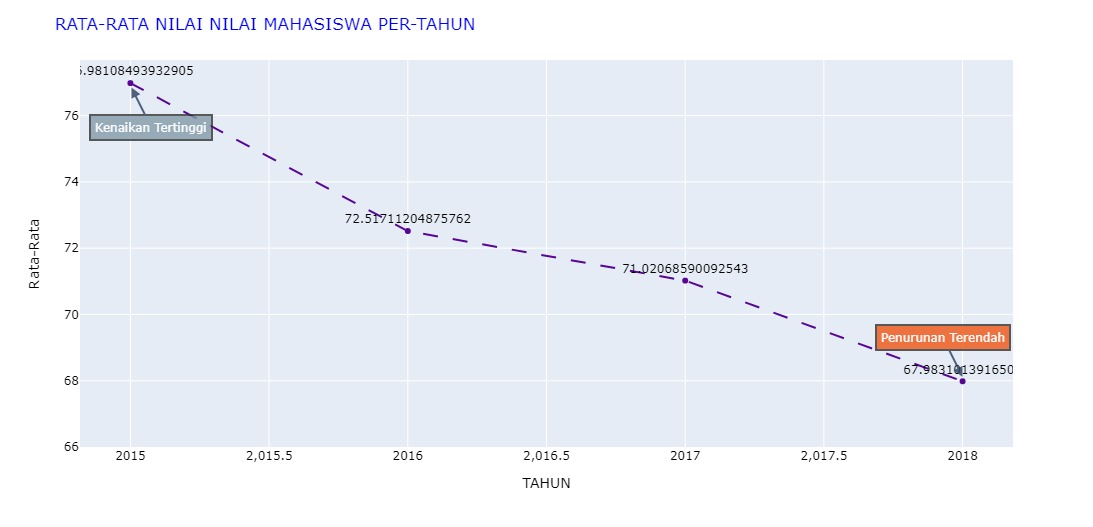

In [96]:
fig = px.line(x=df_15_over.groupby('ANGKATAN').NILAI.mean().index,y=df_15_over.groupby('ANGKATAN').NILAI.mean().values,markers=True,text=df_15_over.groupby('ANGKATAN').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI NILAI MAHASISWA PER-TAHUN',
    title_font_color="blue",
    xaxis_title="TAHUN",
    yaxis_title="Rata-Rata",
    font_color="black",
)
fig.add_annotation(x=2015, y=77,
            text="Kenaikan Tertinggi",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=-5,
            xshift=1,
            ax=20,
            ay=40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#839AA8",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x=2018, y=66,
            text="Penurunan Terendah",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=70,
            xshift=0,
            ax=-20,
            ay=-40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

# pio.write_image(fig, 'RATA-RATA NILAI NILAI MAHASISWA PER-TAHUN.png', width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

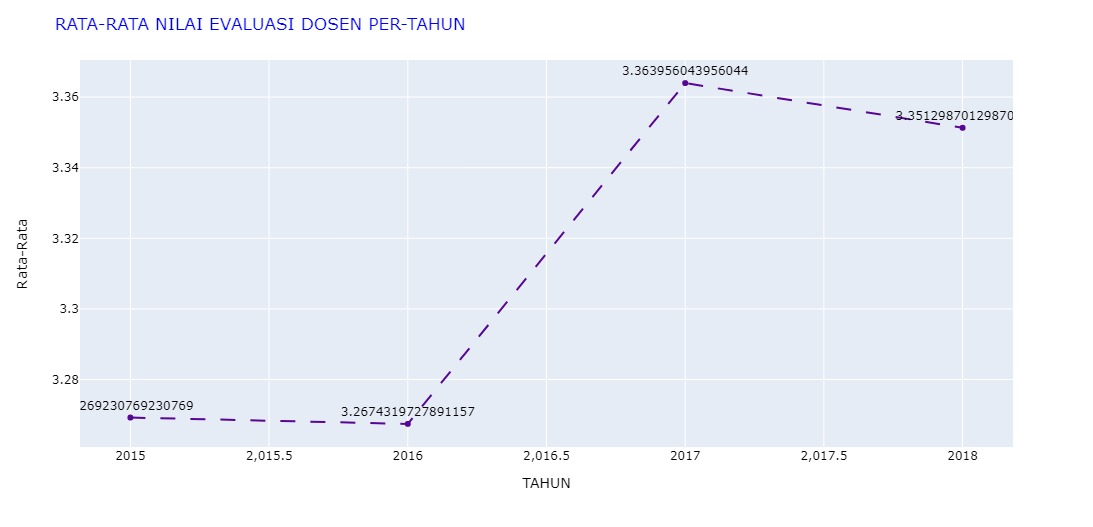

In [97]:
fig = px.line(x=data_eval.groupby('TAHUN').NILAI.mean().index,y=data_eval.groupby('TAHUN').NILAI.mean().values,markers=True,text=data_eval.groupby('TAHUN').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI EVALUASI DOSEN PER-TAHUN',
    title_font_color="blue",
    xaxis_title="TAHUN",
    yaxis_title="Rata-Rata",
    font_color="black",
)

fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

PER SEMESTER

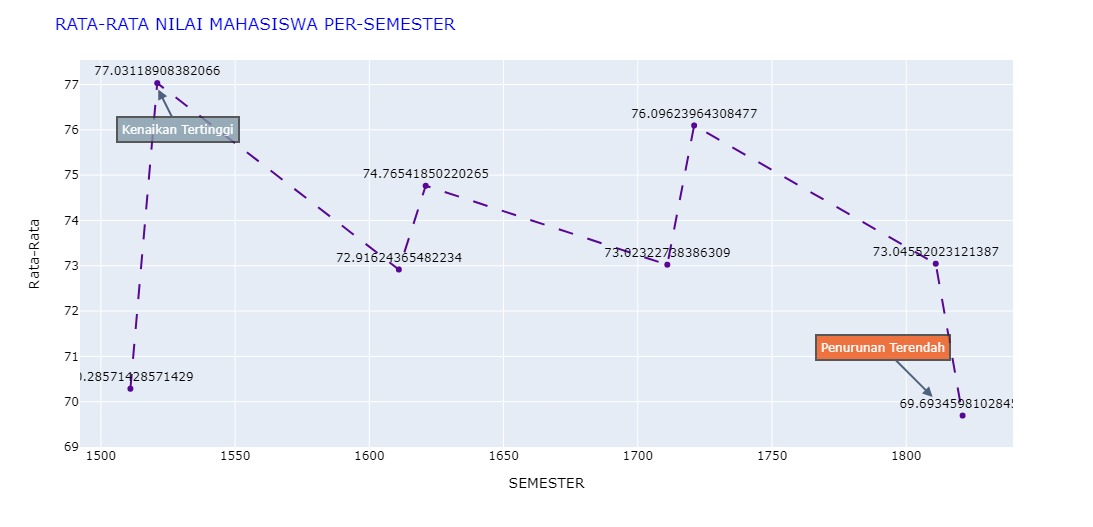

In [98]:
fig = px.line(x=df_15_over.groupby('SEMESTER').NILAI.mean().index,y=df_15_over.groupby('SEMESTER').NILAI.mean().values,markers=True,text=df_15_over.groupby('SEMESTER').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI MAHASISWA PER-SEMESTER',
    title_font_color="blue",
    xaxis_title="SEMESTER",
    yaxis_title="Rata-Rata",
    font_color="black",
)
fig.add_annotation(x=1521, y=77,
            text="Kenaikan Tertinggi",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=-5,
            xshift=1,
            ax=20,
            ay=40,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#839AA8",
            opacity=0.8,
            font_color="#fff")

fig.add_annotation(x=1821, y=69,
            text="Penurunan Terendah",
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            yshift=50,
            xshift=-30,
            ax=-50,
            ay=-50,
            bordercolor="#333",
            borderwidth=2,
            borderpad=4,
            bgcolor="#F15412",
            opacity=0.8,
            font_color="#fff")

pio.write_image(fig, 'RATA-RATA NILAI NILAI MAHASISWA PER-SEMESTER.png', width=1093, height=527)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

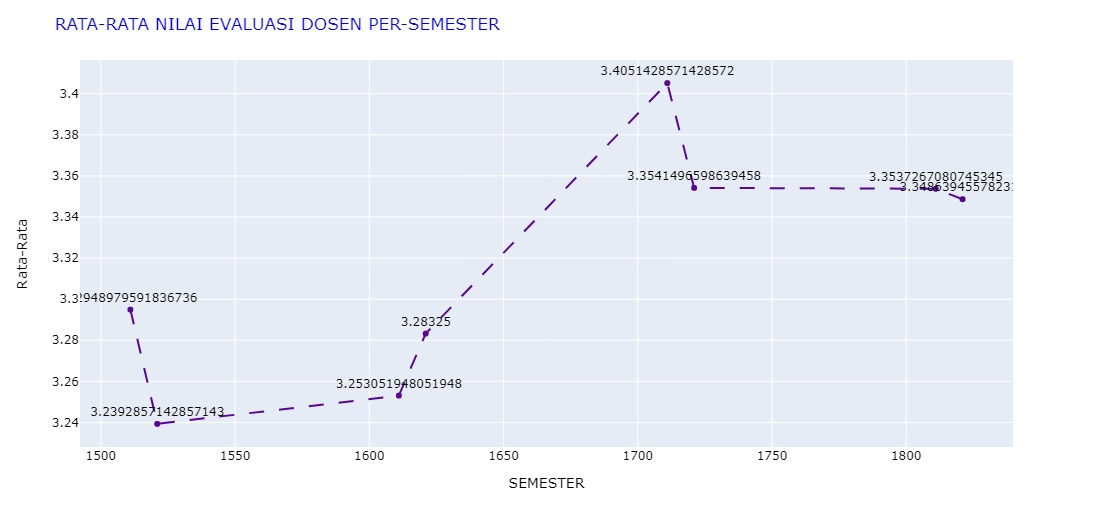

In [99]:
fig = px.line(x=data_eval.groupby('SEMESTER').NILAI.mean().index,y=data_eval.groupby('SEMESTER').NILAI.mean().values,markers=True,text=data_eval.groupby('SEMESTER').NILAI.mean(),line_dash_sequence =['longdash'],color_discrete_sequence=['#590696'])
fig.update_traces(textposition='top center')
fig.update_layout(
    title='RATA-RATA NILAI EVALUASI DOSEN PER-SEMESTER',
    title_font_color="blue",
    xaxis_title="SEMESTER",
    yaxis_title="Rata-Rata",
    font_color="black",
)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

**NILAI MATKUL MAHASISWA PERSEMESTERNYA**

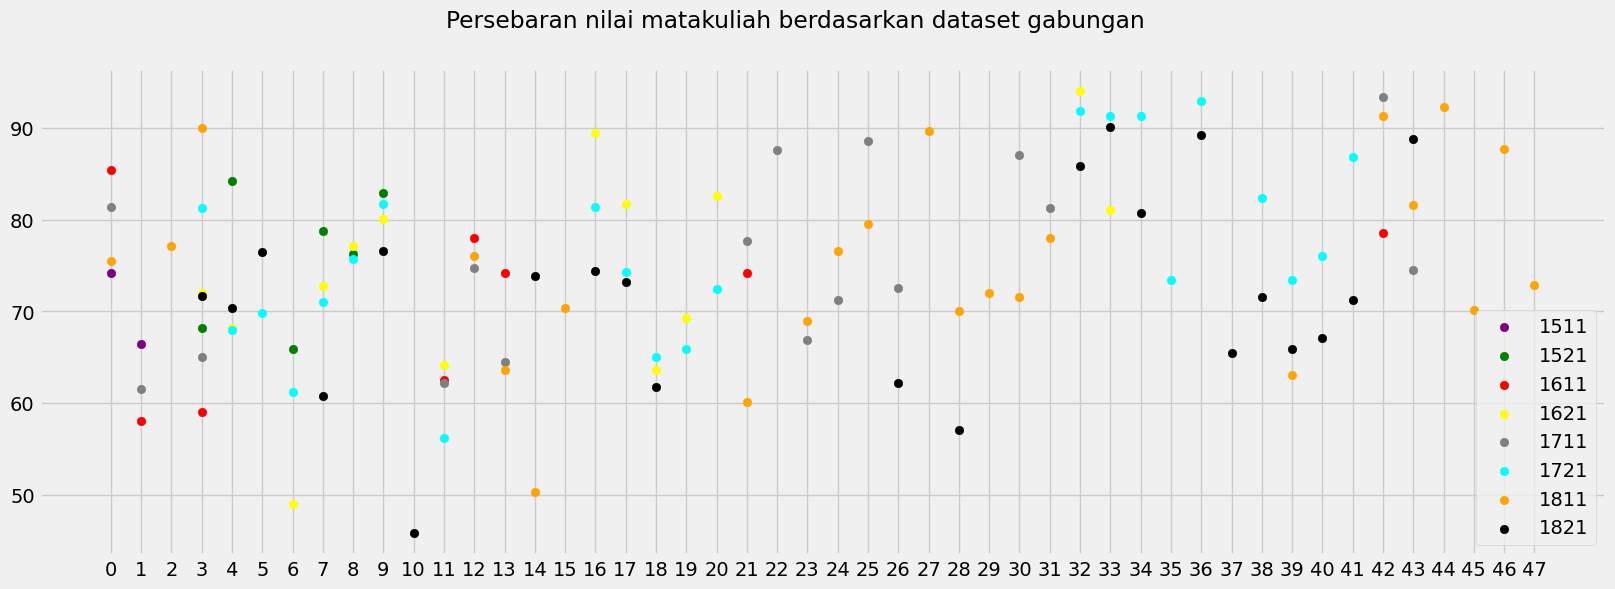

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_15_over_new_mean = pd.DataFrame(df_15_over.groupby(['SEMESTER','KODE_MK']).agg({'NILAI':'mean'})).reset_index()
df_15_over_new_mean
df_15_over_new_mean['KODE_MK'] = le.fit_transform(df_15_over_new_mean.KODE_MK)

plt.figure(figsize=(18,6),dpi=100)
plt.suptitle('Persebaran nilai matakuliah berdasarkan dataset gabungan')
df_cluster_0 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1511]
df_cluster_1 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1521]
df_cluster_2 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1611]
df_cluster_3 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1621]
df_cluster_4 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1711]
df_cluster_5 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1721]
df_cluster_6 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1811]
df_cluster_7 = df_15_over_new_mean[df_15_over_new_mean.SEMESTER == 1821]
plt.scatter(df_cluster_0.KODE_MK,df_cluster_0.NILAI,color='purple',label='1511')
plt.scatter(df_cluster_1.KODE_MK,df_cluster_1.NILAI,color='green',label='1521')
plt.scatter(df_cluster_2.KODE_MK,df_cluster_2.NILAI,color='red',label='1611')
plt.scatter(df_cluster_3.KODE_MK,df_cluster_3.NILAI,color='yellow',label='1621')
plt.scatter(df_cluster_4.KODE_MK,df_cluster_4.NILAI,color='gray',label='1711')
plt.scatter(df_cluster_5.KODE_MK,df_cluster_5.NILAI,color='cyan',label='1721')
plt.scatter(df_cluster_6.KODE_MK,df_cluster_6.NILAI,color='orange',label='1811')
plt.scatter(df_cluster_7.KODE_MK,df_cluster_7.NILAI,color='black',label='1821')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xticks(range(0,48))
plt.legend()
plt.show()

In [101]:
le.inverse_transform([10])

array(['IS255'], dtype=object)

**KITA AMBIL 5 BUAH MATKUL**

untuk membandingkannya secara langsung

In [102]:
data_eval[data_eval.MATAKULIAH=='IS100'].groupby('SEMESTER').NILAI.mean() # pada data eval

SEMESTER
1511    3.265000
1611    3.534286
1711    3.308571
1811    3.321429
Name: NILAI, dtype: float64

In [103]:
df_15_over[df_15_over.KODE_MK=='IS100'].groupby('SEMESTER').NILAI.mean() # pada data mahasiswa

SEMESTER
1511    74.126316
1611    85.423529
1711    81.405660
1811    75.520548
Name: NILAI, dtype: float64

In [104]:
data_eval[data_eval.MATAKULIAH=='IS251'].groupby('SEMESTER').NILAI.mean() # pada data eval

SEMESTER
1521    3.602857
1621    3.670000
1721    3.616429
1821    3.836429
Name: NILAI, dtype: float64

In [105]:
df_15_over[df_15_over.KODE_MK=='IS251'].groupby('SEMESTER').NILAI.mean() # pada data eval

SEMESTER
1521    82.864583
1621    80.084337
1721    81.663551
1821    76.595890
Name: NILAI, dtype: float64

In [106]:
data_eval[data_eval.MATAKULIAH=='IS623'].groupby('SEMESTER').NILAI.mean() # pada data eval

SEMESTER
1521    3.445714
1621    2.591429
1721    3.402857
1821    3.307857
Name: NILAI, dtype: float64

In [107]:
df_15_over[df_15_over.KODE_MK=='IS623'].groupby('SEMESTER').NILAI.mean() # pada data eval

SEMESTER
1621    94.000000
1721    91.831325
1821    85.893939
Name: NILAI, dtype: float64

In [108]:
df_15_over[df_15_over.KODE_MK=='IS652'].groupby('ANGKATAN').NILAI.mean()

ANGKATAN
2015    92.463158
2016    90.576271
2017    87.481481
Name: NILAI, dtype: float64

In [109]:
data_eval[data_eval.MATAKULIAH=='IS652'].groupby('TAHUN').NILAI.mean()

TAHUN
2015    3.475000
2016    3.785714
2017    3.595714
2018    3.545000
Name: NILAI, dtype: float64

In [110]:
df_15_over[df_15_over.KODE_MK=='IS255'].groupby('ANGKATAN').NILAI.mean()

ANGKATAN
2015    42.250000
2016    66.833333
2017    66.657143
2018    40.173611
Name: NILAI, dtype: float64

In [111]:
data_eval[data_eval.MATAKULIAH=='IS255'].groupby('TAHUN').NILAI.mean()

TAHUN
2018    2.657857
Name: NILAI, dtype: float64

### Insight lanjutan & MEMBUAT MODEL DATASET 

#### Features Engineering

Agar lebih mudah untuk melihat SEMESTER dapat dibuat seperti berikut:

In [112]:
data['SEMESTER'] = data.apply(lambda x: (int(str(x['SEMESTER'])[:2])+1 - int(str(x['ANGKATAN'])[2:]))*2-1 if int(str(x['SEMESTER'])[2:3])==1 else (int(str(x['SEMESTER'])[:2])+1 - int(str(x['ANGKATAN'])[2:]))*2,axis=1)

In [113]:
sorted(data.SEMESTER.unique()) # ada orang yang sampe 14 semester masih kuliah UWAW

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

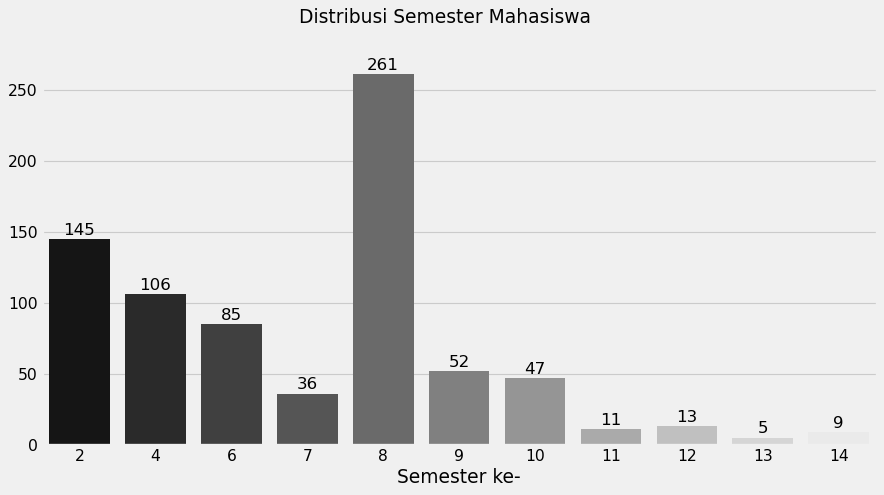

In [114]:
# Plot untuk melihat data lebih detail 
plt.figure(figsize=(12,6),dpi=80)
fig = sns.barplot(x=data.groupby('NIM').SEMESTER.max().value_counts().index,y=data.groupby('NIM').SEMESTER.max().value_counts().values,palette='gray')
plt.suptitle('Distribusi Semester Mahasiswa')
plt.xlabel('Semester ke-')
for bar in fig.patches:
    fig.annotate('%.0f'%bar.get_height(),
                 (bar.get_x()+bar.get_width()/2,
                  bar.get_height()),va='center',ha='center',size=15, xytext=(0, 8),
                   textcoords='offset points',color='Black')
plt.show()

##### MENENTUKAN KRITERIA LULUS UNTUK PREDIKSI

**Ketentuan Kelulusan Mahasiswa**
1.	Sudah menyelesaikan 144 SKS.
2.	Tidak ada nilai D, E, dan F pada setiap mata kuliah.
3.	Nilai akhir per mata kuliah dihitung dengan rumusan: bobot x jumlah SKS mata kuliah tersebut.
Misalnya: Mata kuliah EM100 Dasar – Dasar Bisnis dengan SKS 3, mendapat nilai C 🡪 dengan bobot 2.0, berarti nilai akhir untuk mata kuliah tersebut adalah : 3 x 2.0 = 6.0
Lalu IPS didapatkan dengan total semua nilai akhir mata kuliah dibagi dengan total SKS yang diambil per semester.
Contoh:
 
Total Nilai = (3 x 2.0) + (3 x 3.0) + (4 x 2.0) + (3 x 2.0) + (3 x 3.0) + (2 x 2.0) + (3 x 3.0) = 51
Total SKS = 21
IPS = 51/21 = 2.43

4.	Nilai IPK adalah total nilai IPS dibagi dengan total semester. 
5.	Mahasiswa dinyatakan lulus jika IPK di atas 2.5.


In [115]:
print('Jumlah SKS terbanyak yang diambil oleh suatu Mahasiswa :', data.groupby('NIM').SKS.sum().max())
print('Jumlah SKS tersedikit yang diambil oleh suatu Mahasiswa :', data.groupby('NIM').SKS.sum().min())
print('Jumlah SKS rata-rata yang diambil oleh suatu Mahasiswa :', data.groupby('NIM').SKS.sum().mean())

Jumlah SKS terbanyak yang diambil oleh suatu Mahasiswa : 148
Jumlah SKS tersedikit yang diambil oleh suatu Mahasiswa : 40
Jumlah SKS rata-rata yang diambil oleh suatu Mahasiswa : 110.76363636363637


In [116]:
pd.DataFrame(data.groupby('NIM').SKS.sum().describe()).T

,count,mean,std,min,25%,50%,75%,max
SKS,770.0,110.763636,41.083773,40.0,82.0,134.0,145.0,148.0


In [117]:
print(sum((data.groupby('NIM').SKS.sum()<144))) # Jumlah mahasiswa yang belum menyelesaikan 144 sks
print(sum((data.groupby('NIM').SKS.sum()>=144))) # Jumlah mahasiswa yang sudah menyelesaikan 144 sks

413
357


Mengambil data mahasiswa yang sudah sudah menyelesaikan sks sebanyak 144 atau lebih

In [118]:
sks_mencukupi = []
for a, b in data.groupby('NIM').apply(lambda x: x.SKS.sum()>=144).items():
    if b == True:
        sks_mencukupi.append(a)
len(sks_mencukupi)

357

In [119]:
data_kelulusan = data[data.NIM.apply(lambda x: x in sks_mencukupi)]
del sks_mencukupi
data_kelulusan

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B
...,...,...,...,...,...,...,...,...
22321,12724,2015,7,IS726,Inovasi Teknologi Informasi,3,91.0,A
22322,12724,2015,7,IS782,Sistem & Aplikasi Perusahaan 3,3,78.0,B+
22323,12724,2015,7,UM163,Kewarganegaraan,2,71.0,B
22324,12724,2015,8,IS853,Magang Kerja,4,89.0,A


In [120]:
data_kelulusan.NIM.nunique()

357

In [121]:
data_kelulusan.GRADE.unique() # Pada data ini masih ada yang bernilai D dan juga E, Minimal kelulusan adalah C

array(['C', 'B', 'A', 'D', 'A-', 'B+', 'B-', 'C+', 'E'], dtype=object)

In [122]:
# check mahasiswa yang masih memiliki nilai D dan E
data_kelulusan.loc[(data_kelulusan.GRADE == 'D')|(data_kelulusan.GRADE == 'E'),'NIM'].nunique() # ternyata masih ada 210 mahasiswa yang memiliki nilai D atau E

210

In [123]:
data_kelulusan = data_kelulusan.loc[data_kelulusan.NIM.apply(lambda x:x not in data_kelulusan.loc[(data_kelulusan.GRADE == 'D')|(data_kelulusan.GRADE == 'E'),'NIM'].unique())]
print(data_kelulusan.GRADE.unique())
data_kelulusan.NIM.nunique()

['B' 'A' 'C' 'A-' 'B-' 'B+' 'C+']


147

**Tren Kelulusan Tidak Lebih Dari 4 Tahun**

In [124]:
data_kelulusan[data_kelulusan.SEMESTER>8].NIM.nunique() # terdapat 9 mahasiswa yang lulus lebih dari 8 tahun (tidak mengikuti tren)

9

In [125]:
data_kelulusan = data_kelulusan[data_kelulusan.NIM.apply(lambda x: x not in data_kelulusan[data_kelulusan.SEMESTER>8].NIM.unique())]
data_kelulusan.NIM.nunique() #sehingga menjadi 138 mahasiswa yang mengikuti tren kelulusan

138

In [126]:
# # Membuat Mahasiswa yang tidak mengikuti tren yaitu semester lebih dari 8 karena tidak tepat waktu otomatis kami menganggap jika mereka lulus maka mereka tidak akan mengikuti tren
data_mahas_8_lebih = data.loc[data.SEMESTER>8,'NIM'].unique()
df_mahas_8 = data[data.NIM.apply(lambda x: x in data_mahas_8_lebih)]
df_mahas_8.NIM.nunique() # terdapat 137 mahasiswa yang lebih dari semester 8

137

In [127]:
# Konversi GRADE
data_kelulusan.loc[:,'GRADE'] = data_kelulusan.GRADE.map({'A':4,'A-':3.7,'B+':3.3,'B':3,'B-':2.7,'C+':2.3,'C':2,'D':1,'E':0,'F':0})
data.loc[:,'GRADE'] = data.loc[:,'GRADE'].map({'A':4,'A-':3.7,'B+':3.3,'B':3,'B-':2.7,'C+':2.3,'C':2,'D':1,'E':0,'F':0})
df_mahas_8.loc[:,'GRADE'] = df_mahas_8.loc[:,'GRADE'].map({'A':4,'A-':3.7,'B+':3.3,'B':3,'B-':2.7,'C+':2.3,'C':2,'D':1,'E':0,'F':0})

C:\Users\alrav\AppData\Local\Temp\ipykernel_16196\187081781.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



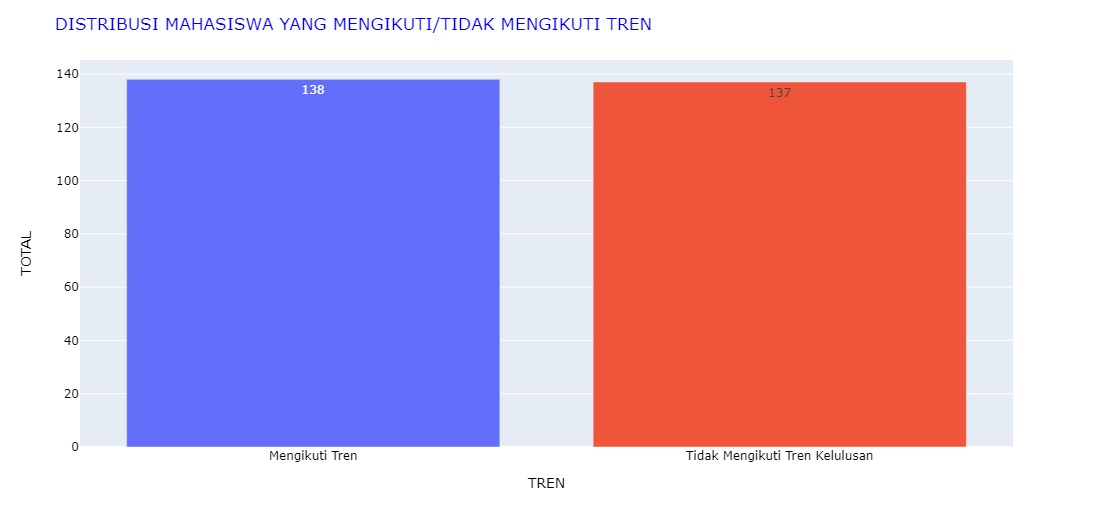

In [128]:
fig = px.bar(x=['Mengikuti Tren','Tidak Mengikuti Tren Kelulusan'],y=[138,137],text_auto=True,color=['Mengikuti Tren','Tidak Mengikuti Tren Kelulusan'])
fig.update_layout(
    title='DISTRIBUSI MAHASISWA YANG MENGIKUTI/TIDAK MENGIKUTI TREN',
    title_font_color="blue",
    xaxis_title="TREN",
    yaxis_title="TOTAL",
    font_color="black",
    showlegend=False,
)
# pio.write_image(fig, 'DISTRIBUSI MAHASISWA YANG MENGIKUTI atau TIDAK MENGIKUTI TREN.png', width=1093, height=527)

fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

Ternyata untuk mahasiswa yang memenuhi kriteria kelulusan, terdapat 138 Mahasiswa yang mengikuti tren kelulusan dan terdapat 137 mahasiswa yang tidak mengikuti tren kelulusan

In [129]:
data_kelulusan.loc[:,'KRITERIA_TREN'] = 'IYA'
df_mahas_8.loc[:,'KRITERIA_TREN'] = 'TIDAK'
new_data = pd.concat([data_kelulusan.reset_index(drop=True),df_mahas_8.reset_index(drop=True)])
new_data

C:\Users\alrav\AppData\Local\Temp\ipykernel_16196\1443507228.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,KRITERIA_TREN
0,10110310005,2010,1,EM100,EM100 Dasar-dasar Bisnis,3,73.0,3.0,IYA
1,10110310005,2010,1,EM180,EM180 Matematika Bisnis,3,99.0,4.0,IYA
2,10110310005,2010,1,TI100,TI100 Algoritma dan Pemrograman,4,93.0,4.0,IYA
3,10110310005,2010,1,TI101,TI101 Matematika Diskrit,3,87.0,4.0,IYA
4,10110310005,2010,1,TI110,TI110 Pengantar Teknologi Multimedia,3,93.0,4.0,IYA
...,...,...,...,...,...,...,...,...,...
6815,11774,2015,7,IS726,Inovasi Teknologi Informasi,3,82.0,3.7,TIDAK
6816,11774,2015,7,IS782,Sistem & Aplikasi Perusahaan 3,3,77.0,3.3,TIDAK
6817,11774,2015,7,UM321,Bahasa Inggris 3,2,72.0,3.0,TIDAK
6818,11774,2015,8,SI863,Tugas Akhir,6,100.0,4.0,TIDAK


In [130]:
new_data['SKSXGRADE'] = new_data['SKS']*new_data['GRADE']
new_data['KODE_MK'] = new_data['KODE_MK'] + ' '
new_data

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,KRITERIA_TREN,SKSXGRADE
0,10110310005,2010,1,EM100,EM100 Dasar-dasar Bisnis,3,73.0,3.0,IYA,9.0
1,10110310005,2010,1,EM180,EM180 Matematika Bisnis,3,99.0,4.0,IYA,12.0
2,10110310005,2010,1,TI100,TI100 Algoritma dan Pemrograman,4,93.0,4.0,IYA,16.0
3,10110310005,2010,1,TI101,TI101 Matematika Diskrit,3,87.0,4.0,IYA,12.0
4,10110310005,2010,1,TI110,TI110 Pengantar Teknologi Multimedia,3,93.0,4.0,IYA,12.0
...,...,...,...,...,...,...,...,...,...,...
6815,11774,2015,7,IS726,Inovasi Teknologi Informasi,3,82.0,3.7,TIDAK,11.1
6816,11774,2015,7,IS782,Sistem & Aplikasi Perusahaan 3,3,77.0,3.3,TIDAK,9.9
6817,11774,2015,7,UM321,Bahasa Inggris 3,2,72.0,3.0,TIDAK,6.0
6818,11774,2015,8,SI863,Tugas Akhir,6,100.0,4.0,TIDAK,24.0


In [131]:
o = new_data.groupby(['NIM','SEMESTER']).agg(SKS=('SKS',np.sum),IPS = ('SKSXGRADE',np.sum),KRITERIA_TREN=('KRITERIA_TREN',np.max),ANGKATAN=('ANGKATAN',np.max),MATKUL=('KODE_MK',np.sum),TOT_MATKUL=('KODE_MK',np.count_nonzero))
o['IPS'] = o['IPS']/o['SKS']
# del o['TOT_MATKUL']
o

SKS       IPS KRITERIA_TREN  ANGKATAN  \
NIM         SEMESTER                                          
8631        1          21  3.452381           IYA      2015   
            2          22  3.540909           IYA      2015   
            3          19  3.826316           IYA      2015   
            4          24  3.579167           IYA      2015   
            5          23  3.439130           IYA      2015   
...                   ...       ...           ...       ...   
14110310105 6          16  3.568750         TIDAK      2014   
            7           9  1.866667         TIDAK      2014   
            8          13  3.069231         TIDAK      2014   
            9          11  3.190909         TIDAK      2014   
            10         11  2.872727         TIDAK      2014   

                                                                 MATKUL  \
NIM         SEMESTER                                                      
8631        1          EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM152    
            2         IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...   
            3                CE441 EA100 IS321 IS341 IS512 UM162 UM163    
            4          EA201 EM604 IS403 IS422 IS431 IS432 IS442 IS623    
            5          EA410 IF635 IS302 IS513 IS534 IS543 IS580 IS725    
...                                                                 ...   
14110310105 6                            IS623 IS624 IS645 IS660 IS670    
            7                                        IS110 IS544 IS747    
            8                            CE441 EM604 IS240 IS652 UM321    
            9                                  EA100 IS725 IS726 UM163    
            10                                 EA410 IS201 IS228 UM152    

                      TOT_MATKUL  
NIM         SEMESTER              
8631        1                  8  
            2                  9  
            3                  7  
            4                  8  
            5                  8  
...                          ...  
14110310105 6                  5  
            7                  3  
            8                  5  
            9                  4  
            10                 4  

[2413 rows x 6 columns]

In [132]:
o

SKS       IPS KRITERIA_TREN  ANGKATAN  \
NIM         SEMESTER                                          
8631        1          21  3.452381           IYA      2015   
            2          22  3.540909           IYA      2015   
            3          19  3.826316           IYA      2015   
            4          24  3.579167           IYA      2015   
            5          23  3.439130           IYA      2015   
...                   ...       ...           ...       ...   
14110310105 6          16  3.568750         TIDAK      2014   
            7           9  1.866667         TIDAK      2014   
            8          13  3.069231         TIDAK      2014   
            9          11  3.190909         TIDAK      2014   
            10         11  2.872727         TIDAK      2014   

                                                                 MATKUL  \
NIM         SEMESTER                                                      
8631        1          EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM152    
            2         IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...   
            3                CE441 EA100 IS321 IS341 IS512 UM162 UM163    
            4          EA201 EM604 IS403 IS422 IS431 IS432 IS442 IS623    
            5          EA410 IF635 IS302 IS513 IS534 IS543 IS580 IS725    
...                                                                 ...   
14110310105 6                            IS623 IS624 IS645 IS660 IS670    
            7                                        IS110 IS544 IS747    
            8                            CE441 EM604 IS240 IS652 UM321    
            9                                  EA100 IS725 IS726 UM163    
            10                                 EA410 IS201 IS228 UM152    

                      TOT_MATKUL  
NIM         SEMESTER              
8631        1                  8  
            2                  9  
            3                  7  
            4                  8  
            5                  8  
...                          ...  
14110310105 6                  5  
            7                  3  
            8                  5  
            9                  4  
            10                 4  

[2413 rows x 6 columns]

**RUANG LINGKUP KRITERIA TREN**

In [133]:
# Jadi Kriteria Tren disini berdasarkan NILAI IPS MINIMAL 3 dan SKS minimal 144 pada semester 7/8
o.reset_index()[o.reset_index().KRITERIA_TREN=='IYA'].groupby('NIM').agg({'SEMESTER':'max','SKS':'sum','IPS':'mean'}).sort_values('IPS',ascending=True).rename(columns={'IPS':'IPK'})

,SEMESTER,SKS,IPK
NIM,,,
10110310041,8,145,3.064544
10110310015,8,145,3.079212
11110310079,8,145,3.109821
13110310040,8,144,3.109851
11900,8,145,3.117206
...,...,...,...
14110310058,8,145,3.950319
9253,8,145,3.954692
12110310025,8,145,3.964286


karena pada data nilai IPS terkecil adalah 3 maka algoritma ini akan memprediksi kelulusan tren yaitu tepat waktu dengan ipk minimal 3

In [134]:
from collections import Counter
list_nilai_terendah = []
for az in o[o.KRITERIA_TREN=='IYA'].index.get_level_values(0).unique():
    list_nilai_terendah.append(o[o.KRITERIA_TREN=='IYA'].xs(az).IPS.idxmin())

list_nilai_terendah = Counter(list_nilai_terendah)
list_nilai_terendah

Counter({5: 12, 3: 49, 1: 45, 8: 5, 2: 20, 4: 5, 7: 2})

**SEMESTER YANG RAWAN AKAN NILAI TURUN**

data diambil berdasarkan orang-orang yang sudah lulus kriteria tren

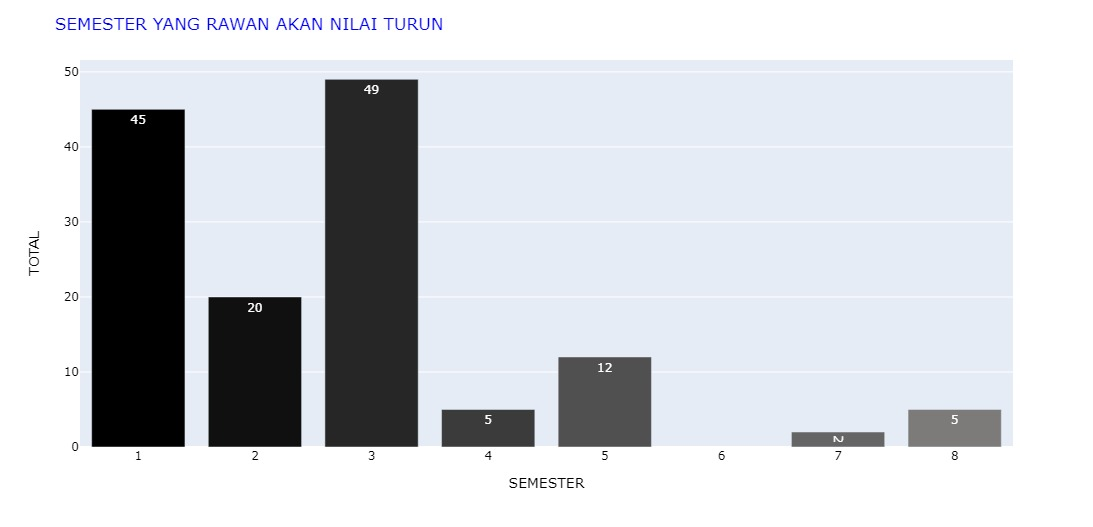

In [135]:
fig = px.bar(pd.DataFrame(list_nilai_terendah.values(),list_nilai_terendah.keys()).sort_index(),color_discrete_sequence=[px.colors.sequential.gray],text_auto=True)
fig.update_layout(
    title='SEMESTER YANG RAWAN AKAN NILAI TURUN',
    title_font_color="blue",
    xaxis_title="SEMESTER",
    yaxis_title="TOTAL",
    font_color="black",
    showlegend=False,
)
# pio.write_image(fig, 'SEMESTER YANG RAWAN AKAN NILAI TURUN.png', width=1093, height=527)

fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

Terjadi penurunan Nilai terbanyak pada mahasiswa yang mengikuti tren pada semester ke-3. Hal ini dikarenakan semester merupakan semester aktif mahasiswa untuk mencoba mengikuti berbagai kepanitiaan dan organisasi

In [136]:
from collections import Counter
list_nilai_tertinggi = []
for az in o[o.KRITERIA_TREN=='IYA'].index.get_level_values(0).unique():
    list_nilai_tertinggi.append(o[o.KRITERIA_TREN=='IYA'].xs(az).IPS.idxmax())

list_nilai_tertinggi = Counter(list_nilai_tertinggi)
list_nilai_tertinggi

Counter({3: 2, 7: 34, 6: 34, 8: 46, 4: 6, 5: 9, 1: 3, 2: 4})

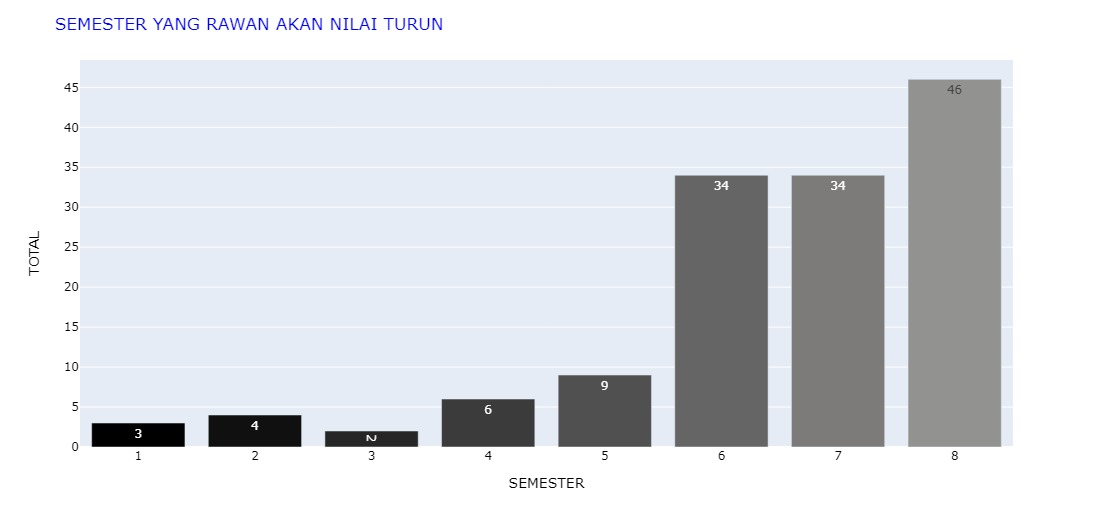

In [137]:
fig = px.bar(pd.DataFrame(list_nilai_tertinggi.values(),list_nilai_tertinggi.keys()).sort_index(),color_discrete_sequence=[px.colors.sequential.gray],text_auto=True)
fig.update_layout(
    title='SEMESTER YANG RAWAN AKAN NILAI TURUN',
    title_font_color="blue",
    xaxis_title="SEMESTER",
    yaxis_title="TOTAL",
    font_color="black",
    showlegend=False,
)
# pio.write_image(fig, 'SEMESTER YANG RAWAN AKAN NILAI TURUN.png', width=1093, height=527)

fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

**FAKTOR PENYEBAB TIDAK MENGIKUTI TREN DIKARENAKAN SKS YANG KURANG**

In [138]:
data_baru = o.reset_index()[o.reset_index().SEMESTER<=8].groupby('NIM').agg({'ANGKATAN':'max','SEMESTER':'max','SKS':'sum','IPS':'mean','KRITERIA_TREN':'max','MATKUL':'sum','TOT_MATKUL':'sum'})
data_baru_TIDAK = data_baru[data_baru.KRITERIA_TREN=='TIDAK'].sort_values(['SKS','IPS'],ascending=[False,False])
data_baru_IYA = data_baru[data_baru.KRITERIA_TREN=='IYA'].sort_values(['SKS','IPS'],ascending=[False,False])
data_baru_TIDAK.MATKUL = data_baru_TIDAK.MATKUL.str.strip()
data_baru_IYA.MATKUL = data_baru_IYA.MATKUL.str.strip()

In [139]:
data_baru_IYA.IPS.min() # IPK minimal 3 

3.064543650793651

In [140]:
data_baru_TIDAK.IPS.min()

1.51542872332346

In [141]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2010].sort_values('TOT_MATKUL',ascending=False).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
10110310044,2010,8,141,3.560268,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
10110310022,2010,8,139,2.834984,TIDAK,EM100 EM180 TI110 UM121 UM151 EM201 IK402 SI20...,48
10110310045,2010,8,139,2.795827,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
10110310028,2010,8,139,2.740774,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
10110310080,2010,8,139,2.605426,TIDAK,EM100 EM180 TI101 TI110 UM151 EM201 IK402 SI20...,48


In [142]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2010].sort_values('TOT_MATKUL',ascending=True).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
10110310005,2010,8,145,3.728022,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
10110310053,2010,7,145,3.161475,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
10110310033,2010,8,145,3.210165,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
10110310077,2010,8,145,3.313581,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
10110310046,2010,8,145,3.317975,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49


In [143]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2011].sort_values('TOT_MATKUL',ascending=False).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
11110310036,2011,8,142,2.878385,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
11110310056,2011,8,141,3.115714,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
11110310051,2011,8,136,2.951766,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,47
11110310047,2011,8,136,2.708313,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,47
11110310078,2011,8,132,2.840575,TIDAK,TI100 TI110 UM121 UM151 EM201 IK402 SI200 SI21...,46


In [144]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2011].sort_values('TOT_MATKUL',ascending=True).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
11110310071,2011,8,144,3.210731,IYA,EM100 TI110 UM121 UM151 EM201 IK402 SI200 SI21...,49
11110310009,2011,7,145,3.662406,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
11110310026,2011,7,145,3.231239,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
11110310033,2011,8,145,3.596786,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49
11110310020,2011,7,145,3.594674,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,49


In [145]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2012].sort_values('TOT_MATKUL',ascending=False).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
12110310058,2012,8,142,2.888095,TIDAK,EM100 EM180 TI100 TI101 UM121 EM201 IK402 SI20...,50
12110310006,2012,8,138,2.849460,TIDAK,EM100 EM180 TI100 TI101 TI110 EM201 IK402 SI20...,48
12110310057,2012,7,135,2.964796,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,47
12110310001,2012,7,135,2.950340,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,47
12110310060,2012,8,135,2.735718,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,47


In [146]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2012].sort_values('TOT_MATKUL',ascending=True).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
12110310024,2012,8,145,4.000000,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
12110310025,2012,8,145,3.964286,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
12110310008,2012,8,145,3.920513,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
12110310003,2012,7,145,3.776584,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
12110310034,2012,7,145,3.754556,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50


In [147]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2013].sort_values('TOT_MATKUL',ascending=False).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
13110310053,2013,7,138,3.851198,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
13110310020,2013,8,138,3.241994,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
13110310013,2013,8,138,3.091190,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
13110310068,2013,8,138,3.055095,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48
13110310008,2013,7,138,3.047036,TIDAK,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,48


In [148]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2013].sort_values('TOT_MATKUL',ascending=True).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
13110310024,2013,8,144,3.516548,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
13110310031,2013,8,144,3.460767,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
13110310005,2013,8,144,3.459643,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50
13110310062,2013,8,144,3.421091,IYA,EM100 EM180 TI100 TI110 UM121 UM151 EM201 IK40...,50
13110310064,2013,8,144,3.398699,IYA,EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20...,50


In [149]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2014].sort_values('TOT_MATKUL',ascending=False).head().rename(columns={'IPS':'IPK'})

,ANGKATAN,SEMESTER,SKS,IPK,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
14110310095,2014,8,142,3.287968,TIDAK,EM190 EM372 IF110 IS100 IS110 UM122 UM152 UM16...,51
14110310067,2014,8,142,3.187443,TIDAK,EM190 EM372 IF110 IF140 IS100 IS110 UM152 UM16...,51
14110310017,2014,8,142,3.013698,TIDAK,EM190 EM372 IF110 IS100 IS110 UM152 UM162 IK40...,51
14110310044,2014,8,142,3.130161,TIDAK,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
14110310026,2014,8,142,3.160705,TIDAK,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51


In [150]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2014].sort_values('TOT_MATKUL',ascending=True).head().rename(columns={'IPS':'IPK'})

,ANGKATAN,SEMESTER,SKS,IPK,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
14110310058,2014,8,145,3.950319,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,52
14110310013,2014,8,145,3.295848,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM152 UM16...,52
14110310012,2014,8,145,3.309901,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,52
14110310018,2014,8,145,3.337420,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,52
14110310085,2014,8,145,3.362171,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,52


In [151]:
data_baru_TIDAK[data_baru_TIDAK.ANGKATAN==2015].sort_values('TOT_MATKUL',ascending=False).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
10495,2015,8,142,2.867741,TIDAK,EM190 IF110 IF140 IS100 IS110 UM122 UM152 IK40...,50
11774,2015,8,141,3.353525,TIDAK,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,50
9318,2015,8,139,3.308219,TIDAK,EM190 IF110 IF140 IS100 IS110 UM122 UM152 IK40...,50


In [152]:
data_baru_IYA[data_baru_IYA.ANGKATAN==2015].sort_values('TOT_MATKUL',ascending=True).head()

,ANGKATAN,SEMESTER,SKS,IPS,KRITERIA_TREN,MATKUL,TOT_MATKUL
NIM,,,,,,,
9253,2015,8,145,3.954692,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
9665,2015,7,145,3.210769,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
11029,2015,8,145,3.266046,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
11943,2015,7,145,3.432421,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
10887,2015,8,145,3.453376,IYA,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51


In [153]:
print(data_baru_TIDAK.ANGKATAN.unique())
print(data_baru_IYA.ANGKATAN.unique())

print(data_baru_TIDAK.index.nunique())
print(data_baru_IYA.index.nunique())

[2014 2012 2011 2015 2010 2013]
[2012 2015 2014 2011 2010 2013]
137
138


In [154]:
o.reset_index()[o.reset_index().NIM==14110310095]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
2365,14110310095,1,20,3.005000,TIDAK,2014,EM190 EM372 IF110 IS100 IS110 UM122 UM152 UM162,8
2366,14110310095,2,22,3.272727,TIDAK,2014,IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...,9
2367,14110310095,3,20,3.090000,TIDAK,2014,CE441 EA100 IS302 IS321 IS341 IS512 UM163,7
2368,14110310095,4,17,2.717647,TIDAK,2014,EA201 EM604 IS403 IS431 IS432 IS442,6
2369,14110310095,5,22,3.045455,TIDAK,2014,EA410 IF140 IF635 IS513 IS534 IS543 IS545 UM321,8
2370,14110310095,6,18,3.716667,TIDAK,2014,IS422 IS624 IS647 IS652 IS660 IS670,6
2371,14110310095,7,16,3.756250,TIDAK,2014,IF141 IS725 IS726 IS749 IS853,5
2372,14110310095,8,7,3.700000,TIDAK,2014,IS623 IS761,2
2373,14110310095,9,3,3.300000,TIDAK,2014,IS862,1


In [155]:
o.reset_index()[o.reset_index().NIM==14110310046]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
2098,14110310046,1,23,3.047826,TIDAK,2014,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,9
2099,14110310046,2,22,3.440909,TIDAK,2014,IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...,9
2100,14110310046,3,20,2.925000,TIDAK,2014,CE441 EA100 IS302 IS321 IS341 IS512 UM163,7
2101,14110310046,4,19,3.031579,TIDAK,2014,EA201 EM604 IS403 IS422 IS431 IS442 UM321,7
2102,14110310046,5,18,3.116667,TIDAK,2014,EA410 IF635 IS534 IS543 IS580 IS727,6
2103,14110310046,6,22,3.422727,TIDAK,2014,IS432 IS623 IS624 IS652 IS660 IS670 IS681,7
2104,14110310046,7,15,3.426667,TIDAK,2014,IS513 IS725 IS726 IS782 IS853,5
2105,14110310046,8,3,3.700000,TIDAK,2014,IS761,1
2106,14110310046,9,3,2.300000,TIDAK,2014,IS862,1


In [156]:
o.reset_index()[o.reset_index().NIM==14110310033]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
2026,14110310033,1,18,2.555556,TIDAK,2014,EM190 EM372 IF110 IS100 IS110 UM152 UM162,7
2027,14110310033,2,22,3.068182,TIDAK,2014,IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...,9
2028,14110310033,3,15,2.740000,TIDAK,2014,EA100 IF140 IS302 IS321 IS341,5
2029,14110310033,4,20,3.285000,TIDAK,2014,EA201 EM604 IS403 IS422 IS431 IS432 IS442,7
2030,14110310033,5,17,3.294118,TIDAK,2014,EA410 IF635 IS513 IS534 IS543 IS544,6
2031,14110310033,6,22,3.863636,TIDAK,2014,IS623 IS624 IS645 IS652 IS660 IS670 IS726,7
2032,14110310033,7,21,3.185714,TIDAK,2014,CE441 IS512 IS725 IS727 IS747 UM122 UM163 UM321,8
2033,14110310033,8,7,4.000000,TIDAK,2014,IS761 IS853,2
2034,14110310033,9,3,3.700000,TIDAK,2014,IS862,1


In [157]:
o.reset_index()[o.reset_index().NIM==14110310091]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
2339,14110310091,1,23,2.721739,TIDAK,2014,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,9
2340,14110310091,2,22,3.086364,TIDAK,2014,IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...,9
2341,14110310091,3,14,2.892857,TIDAK,2014,IS302 IS321 IS341 IS512 UM163,5
2342,14110310091,4,19,3.521053,TIDAK,2014,EM604 IS403 IS422 IS431 IS432 IS442 UM321,7
2343,14110310091,5,17,3.223529,TIDAK,2014,CE551 IF635 IS513 IS534 IS543 IS725,6
2344,14110310091,6,19,3.621053,TIDAK,2014,CE651 IS623 IS624 IS652 IS670 IS726,6
2345,14110310091,7,18,3.116667,TIDAK,2014,CE441 CE751 EA100 EA410 IS342 IS727,6
2346,14110310091,8,10,3.790000,TIDAK,2014,IS660 IS761 IS853,3
2347,14110310091,9,3,3.700000,TIDAK,2014,IS862,1


In [158]:
o.reset_index()[o.reset_index().NIM==14110310060]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
2178,14110310060,1,23,3.139130,TIDAK,2014,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,9
2179,14110310060,2,22,3.318182,TIDAK,2014,IK402 IS201 IS220 IS230 IS240 IS250 IS251 UM14...,9
2180,14110310060,3,20,2.820000,TIDAK,2014,CE441 EA100 IS302 IS321 IS341 IS512 UM163,7
2181,14110310060,4,23,3.065217,TIDAK,2014,EA201 EM604 IS403 IS422 IS431 IS432 IS442 IS652,8
2182,14110310060,5,20,3.160000,TIDAK,2014,EA410 IF635 IS513 IS534 IS543 IS580 IS727,7
2183,14110310060,6,18,3.522222,TIDAK,2014,IS623 IS624 IS660 IS670 IS681 UM321,6
2184,14110310060,7,9,3.466667,TIDAK,2014,IS725 IS726 IS782,3
2185,14110310060,8,7,3.300000,TIDAK,2014,IS761 IS853,2
2186,14110310060,9,3,3.700000,TIDAK,2014,IS862,1


Another

In [159]:
p = o.reset_index().groupby('NIM').agg({'SEMESTER':'max','SKS':'sum','IPS':'mean','KRITERIA_TREN':'max','ANGKATAN':'max','MATKUL':'sum','TOT_MATKUL':'sum'})
p

,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
NIM,,,,,,,
8631,7,145,3.588986,IYA,2015,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
8684,7,145,3.532975,IYA,2015,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
9139,8,145,3.760490,IYA,2015,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
9252,8,145,3.498027,IYA,2015,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
9253,8,145,3.954692,IYA,2015,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,51
...,...,...,...,...,...,...,...
14110310095,9,145,3.289305,TIDAK,2014,EM190 EM372 IF110 IS100 IS110 UM122 UM152 UM16...,52
14110310098,9,145,3.142144,TIDAK,2014,EM190 EM372 IF110 IF140 IS100 IS110 UM122 UM15...,52
14110310101,10,138,3.185988,TIDAK,2014,IF110 IF140 IS110 UM152 UM162 IK402 IS201 IS22...,49


In [160]:
p[p.KRITERIA_TREN=='IYA'].MATKUL.value_counts() # setiap orang memiliki matakuliah pilihannya sendiri sehingga ini tidak bisa menjadi faktor penentu mengikuti tren atau tidak

EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 CE441 EM604 IS220 IS321 IS341 IS534 IS726 EA100 IF635 IS403 IS422 IS512 IS543 IS580 EA201 EA410 IS513 IS623 IS652 IS660 IS681 IS670 IS725 IS782 IS853 IS761 IS862                 8
EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 CE441 EM604 IS220 IS321 IS341 IS534 IS726 EA100 IF635 IS403 IS422 IS512 IS543 IS544 EA201 EA410 IS513 IS623 IS645 IS652 IS660 IS670 IS725 IS747 IS853 IS761 IS862                 6
EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM201 IK402 SI200 SI214 TI220 UM141 UM160 UM222 EM372 SI210 SI301 SI302 SI325 SI750 SK304 TI330 EM604 SI415 SI420 SI426 SI431 SK430 TI403 EA100 SI511 SI521 SI522 SI527 SI541 TI532 EA410 SI612 SI628 SI643 SI661 SI664 TI751 SI723 SI725 SI745 SI860 SI863                       4
EM100 EM180 TI100 TI101 TI110 UM121 UM151 EM20

In [161]:
p[p.KRITERIA_TREN=='IYA'].index.nunique() # dari 138 mahasiswa hanya 8 mahasiswa yang memiliki matakuliah yang sama, tidak sampai 1 persen dari keseluruhan data

138

### Clustering + new Insight

In [162]:
df_15_over   

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
17687,8429,2015,1511,IS100,Sistem Informasi Dalam Manajemen,3,100.0,A
17688,8429,2015,1511,IS110,Matematika Bisnis,3,85.0,A
17692,8429,2015,1521,IS220,Interaksi Manusia dan Komputer,3,80.0,A-
17693,8429,2015,1521,IS230,Algoritma dan Pemrograman,3,55.0,C
17694,8429,2015,1521,IS240,Probabilitas dan Statistik,3,86.0,A
...,...,...,...,...,...,...,...,...
30864,33849,2018,1821,IS201,Proses Bisnis Korporat,3,0.0,E
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D


In [163]:
df_15_over.NIM.nunique()

432

In [164]:
df_15_over_new = df_15_over.drop(['NIM','NAMA_MK','SKS','GRADE',],axis=1)
df_15_over_new

,ANGKATAN,SEMESTER,KODE_MK,NILAI
17687,2015,1511,IS100,100.0
17688,2015,1511,IS110,85.0
17692,2015,1521,IS220,80.0
17693,2015,1521,IS230,55.0
17694,2015,1521,IS240,86.0
...,...,...,...,...
30864,2018,1821,IS201,0.0
30865,2018,1821,IS220,26.0
30866,2018,1821,IS240,38.0
30867,2018,1821,IS251,49.0


In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le = LabelEncoder()
df_15_over_new.KODE_MK = le.fit_transform(df_15_over_new.KODE_MK)

In [167]:
df_15_over_new

,ANGKATAN,SEMESTER,KODE_MK,NILAI
17687,2015,1511,0,100.0
17688,2015,1511,1,85.0
17692,2015,1521,4,80.0
17693,2015,1521,6,55.0
17694,2015,1521,7,86.0
...,...,...,...,...
30864,2018,1821,3,0.0
30865,2018,1821,4,26.0
30866,2018,1821,7,38.0
30867,2018,1821,9,49.0


In [168]:
# df_15_over_new.isna().sum()

In [169]:
df_15_over_new.isna().sum()

ANGKATAN    0
SEMESTER    0
KODE_MK     0
NILAI       9
dtype: int64

In [170]:
df_15_over_new = df_15_over_new[~(df_15_over_new.NILAI.isna())]

In [171]:
df_15_over_new

,ANGKATAN,SEMESTER,KODE_MK,NILAI
17687,2015,1511,0,100.0
17688,2015,1511,1,85.0
17692,2015,1521,4,80.0
17693,2015,1521,6,55.0
17694,2015,1521,7,86.0
...,...,...,...,...
30864,2018,1821,3,0.0
30865,2018,1821,4,26.0
30866,2018,1821,7,38.0
30867,2018,1821,9,49.0


In [172]:
# plt.figure(figsize=(18,6),dpi=100)
# df_cluster_0 = df_15_over_new_mean[df_15_over_new_mean.ANGKATAN == 2015]
# df_cluster_1 = df_15_over_new_mean[df_15_over_new_mean.ANGKATAN == 2016]
# df_cluster_2 = df_15_over_new_mean[df_15_over_new_mean.ANGKATAN == 2017]
# df_cluster_3 = df_15_over_new_mean[df_15_over_new_mean.ANGKATAN == 2018]
# plt.scatter(df_cluster_0.KODE_MK,df_cluster_0.NILAI,color='purple',label='2015')
# plt.scatter(df_cluster_1.KODE_MK,df_cluster_1.NILAI,color='green',label='2016')
# plt.scatter(df_cluster_2.KODE_MK,df_cluster_2.NILAI,color='red',label='2017')
# plt.scatter(df_cluster_3.KODE_MK,df_cluster_3.NILAI,color='yellow',label='2018')
# # plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
# plt.xticks(range(0,48))
# plt.legend()
# plt.show()

In [173]:
# df_15_over_new_mean = df_15_over_new_mean.drop('SEMESTER',axis=1)

In [174]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_15_over_new)
    sse.append(kmeans.inertia_)

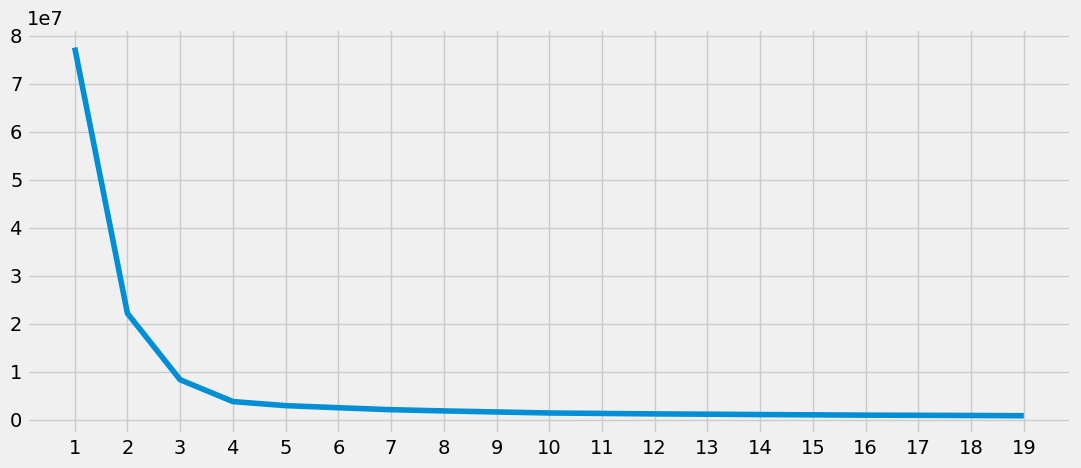

In [175]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(range(1,20),sse)
plt.xticks(range(1,20))
plt.show()

In [176]:
kmeans = KMeans(n_clusters=3)
df_15_over_new['cluster'] = kmeans.fit_predict(df_15_over_new)

C:\Users\alrav\AppData\Local\Temp\ipykernel_16196\2441202303.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
# df_15_over_new['ANGKATAN'] = df_15_over['ANGKATAN']
# df_15_over_new

In [178]:
kmeans.cluster_centers_

array([[2015.29590818, 1583.06087824,    9.01996008,   74.55938124],
       [2016.75789784, 1816.91378801,   19.02214349,   71.06318276],
       [2015.95433599, 1717.57310432,   16.57268538,   75.0431504 ]])

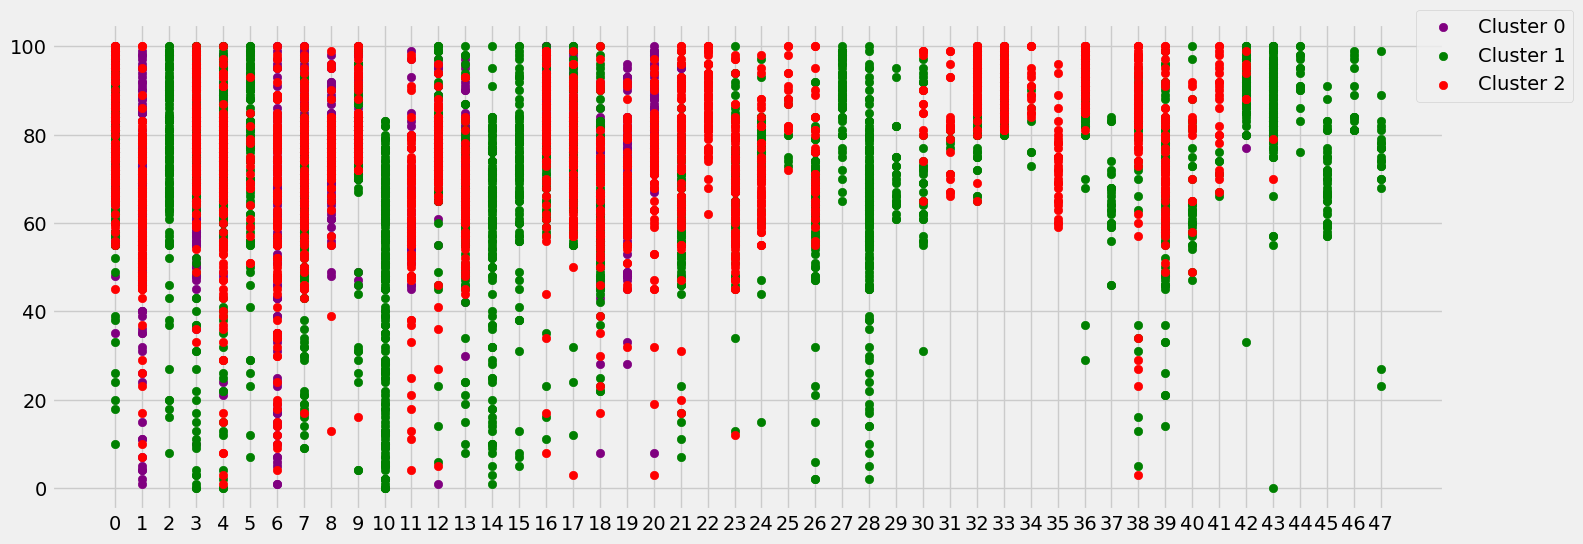

In [179]:
plt.figure(figsize=(16,6),dpi=100)
df_cluster_0 = df_15_over_new[df_15_over_new.cluster == 0]
df_cluster_1 = df_15_over_new[df_15_over_new.cluster == 1]
df_cluster_2 = df_15_over_new[df_15_over_new.cluster == 2]
# df_cluster_3 = df_15_over_new[df_15_over_new.cluster == 3]
plt.scatter(df_cluster_0.KODE_MK,df_cluster_0.NILAI,color='purple',label='Cluster 0')
plt.scatter(df_cluster_1.KODE_MK,df_cluster_1.NILAI,color='green',label='Cluster 1')
plt.scatter(df_cluster_2.KODE_MK,df_cluster_2.NILAI,color='red',label='Cluster 2')
# plt.scatter(df_cluster_3.KODE_MK,df_cluster_3.NILAI,color='yellow',label='Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xticks(range(0,48))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

pada clustering ini terbagi menjadi 4 cluster

kita bisa melihat bahwa untuk cluster hijau memiliki nilai dibawah 40

dan warna merah memiliki nilai dari 40 keatas hingga 80 kebawah

lalu cluster berikutnya memiliki nilai dari mungkin 70 hingga 100 akan tetapi, disini terbagi menjadi 2 yaitu warna ungu dan warna kuning

berarti terdapat faktor lain selain nilai yang menentukan titik cluster

dan dapat dilihat pada grafik tersebut faktor lainnya berupa kode_matakuliah yang semakin kekanan matakuliah tersebut semakin sedikit

In [180]:
# from sklearn.cluster import KMeans
# sse = []
# for i in range(1,20):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(df_15_over_new_mean)
#     sse.append(kmeans.inertia_)

In [181]:
# plt.figure(figsize=(12,6),dpi=100)
# plt.plot(range(1,20),sse)
# plt.xticks(range(1,20))
# plt.show()

In [182]:
# kmeans = KMeans(n_clusters=4)
# df_15_over_new_mean['cluster'] = kmeans.fit_predict(df_15_over_new_mean)

In [183]:
# plt.figure(figsize=(16,6),dpi=100)
# df_cluster_0 = df_15_over_new_mean[df_15_over_new_mean.cluster == 0]
# df_cluster_1 = df_15_over_new_mean[df_15_over_new_mean.cluster == 1]
# df_cluster_2 = df_15_over_new_mean[df_15_over_new_mean.cluster == 2]
# df_cluster_3 = df_15_over_new_mean[df_15_over_new_mean.cluster == 3]
# plt.scatter(df_cluster_0.KODE_MK,df_cluster_0.NILAI,color='purple',label='Cluster 0')
# plt.scatter(df_cluster_1.KODE_MK,df_cluster_1.NILAI,color='green',label='Cluster 1')
# plt.scatter(df_cluster_2.KODE_MK,df_cluster_2.NILAI,color='red',label='Cluster 2')
# plt.scatter(df_cluster_3.KODE_MK,df_cluster_3.NILAI,color='yellow',label='Cluster 3')
# # plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')
# plt.xticks(range(0,48))
# plt.legend(bbox_to_anchor=(1.1, 1.05))

# plt.show()

### APRIORI & COSINE SMILIARITY
pada matakuliah

In [184]:
from apyori import apriori
from sklearn.metrics.pairwise import cosine_similarity

In [185]:
new_data.fillna('Tugas Akhir',inplace=True)

In [186]:
new_data.NILAI.describe()

count    13768.000000
mean        76.693783
std         13.574277
min          0.000000
25%         69.000000
50%         75.000000
75%         88.000000
max        100.000000
Name: NILAI, dtype: float64

In [187]:
pivot_tab = new_data[(new_data.KRITERIA_TREN=='IYA')&(new_data.ANGKATAN==2015)].pivot_table(index='NAMA_MK',columns='NIM',values='NILAI')
pivot_tab.fillna(0,inplace=True)
pivot_tab

NIM,8631,8684,9139,9252,9253,9357,9393,9665,10064,10245,...,11766,11772,11855,11866,11900,11943,12005,12234,12575,12700
NAMA_MK,,,,,,,,,,,,,,,,,,,,,
Administrasi Database 1,0.0,0.0,0.0,100.0,0.0,93.0,0.0,0.0,0.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,89.0,100.0
Administrasi Database 2,0.0,0.0,0.0,100.0,0.0,91.0,0.0,0.0,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,94.0,90.0
Agama,81.0,84.0,81.0,81.0,86.0,82.0,88.0,74.0,96.0,84.0,...,74.0,95.0,83.0,77.0,64.0,71.0,68.0,82.0,77.0,72.0
Algoritma dan Pemrograman,69.0,67.0,78.0,60.0,91.0,68.0,57.0,57.0,79.0,74.0,...,65.0,76.0,65.0,73.0,62.0,77.0,83.0,86.0,65.0,78.0
Analisis & Perancangan SI,83.0,88.0,83.0,81.0,94.0,81.0,89.0,80.0,96.0,95.0,...,77.0,83.0,82.0,78.0,78.0,81.0,78.0,83.0,95.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tata Kelola Teknologi Informasi 3,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Technopreneurship,72.0,85.0,87.0,82.0,82.0,71.0,98.0,83.0,82.0,87.0,...,84.0,80.0,84.0,80.0,83.0,82.0,84.0,75.0,88.0,76.0
Testing dan Implementasi SI,94.0,97.0,98.0,98.0,91.0,88.0,93.0,86.0,92.0,96.0,...,98.0,88.0,92.0,82.0,84.0,94.0,99.0,96.0,95.0,88.0


In [188]:
cosine_similarity(pivot_tab).shape
smiliarity_scores = cosine_similarity(pivot_tab)

In [189]:
def recommend(matkul):
    
    index = np.where(pivot_tab.index==matkul)[0][0]
    smiliar_item  = sorted(list(enumerate(smiliarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in smiliar_item:
        print(pivot_tab.index[i[0]],i[1])
        
        
    # return suggestion

In [190]:
recommend('Analisis & Perancangan SI')

Perilaku Organisasi 0.9971902962756446
E-Business 0.9970853187217179
Interaksi Manusia dan Komputer 0.9969621678473815
Sistem Informasi Dalam Manajemen 0.9968110645150692
Pengantar Manajemen & Bisnis 0.9967166751449379


In [191]:
list_mk_key = dict(data[['KODE_MK','NAMA_MK']].drop_duplicates().values)
# list_mk_key

In [192]:
dataset_apriori = o.reset_index()[(o.reset_index().ANGKATAN==2015)&(o.reset_index().SEMESTER==5)&(o.reset_index().KRITERIA_TREN=='IYA')].groupby('NIM').agg({'MATKUL':'sum'})
# print(dataset_apriori.NIM.nunique())
# dataset_apriori.MATKUL.apply(lambda x: x.strip().split())

In [193]:
# list_mk = set(dataset_apriori.MATKUL.sum().strip().split())

# df_list_mk = pd.DataFrame(index=dataset_apriori.NIM.unique(),columns=sorted(list_mk))

# for i in  dataset_apriori.NIM.unique():
#     init = dataset_apriori[dataset_apriori.NIM==i].MATKUL.str.strip().str.split().values[0]
#     for col in df_list_mk.columns.values:
#         for isi in init:
#             df_list_mk.loc[i].iloc[np.where(df_list_mk.columns==col)] = np.where(col==isi,isi,df_list_mk.loc[i].iloc[np.where(df_list_mk.columns==col)])
# # df_list_mk = df_list_mk.fillna(0)
# # for col in df_list_mk.columns.values:
# #     df_list_mk[col] = df_list_mk[col].fillna(f'NO %s'%col)
    
# df_list_mk.shape

In [194]:
# df_list_mk

In [195]:
# records = []
# for i in range(df_list_mk.shape[0]):
#     records.append([str(df_list_mk.values[i,j]) for j in range(df_list_mk.shape[1]) if pd.notna(df_list_mk.values[i,j])])

In [196]:
o.reset_index()[(o.reset_index().ANGKATAN==2015)&(o.reset_index().SEMESTER==5)&(o.reset_index().KRITERIA_TREN=='IYA')]

,NIM,SEMESTER,SKS,IPS,KRITERIA_TREN,ANGKATAN,MATKUL,TOT_MATKUL
4,8631,5,23,3.439130,IYA,2015,EA410 IF635 IS302 IS513 IS534 IS543 IS580 IS725,8
11,8684,5,20,3.310000,IYA,2015,CE551 EA410 IF635 IS512 IS513 IS534 IS543,7
18,9139,5,20,3.955000,IYA,2015,EA410 IF635 IS512 IS513 IS534 IS543 IS580,7
26,9252,5,20,3.100000,IYA,2015,EA410 IF635 IS302 IS513 IS534 IS543 IS544,7
34,9253,5,20,3.910000,IYA,2015,EA410 IF635 IS512 IS513 IS534 IS543 IS545,7
51,9357,5,23,3.334783,IYA,2015,EA410 IF635 IS302 IS513 IS534 IS543 IS544 IS725,8
58,9393,5,20,3.505000,IYA,2015,EA410 IF635 IS512 IS513 IS534 IS543 IS571,7
66,9665,5,20,3.100000,IYA,2015,EA410 IF635 IS302 IS513 IS534 IS543 IS580,7
73,10064,5,20,3.715000,IYA,2015,EA410 IF635 IS512 IS513 IS534 IS543 IS545,7
81,10245,5,20,3.700000,IYA,2015,EA410 IF635 IS512 IS513 IS534 IS543 IS544,7


In [197]:
1/24

0.041666666666666664

In [198]:
records = dataset_apriori.MATKUL.apply(lambda x: [b.replace(b,list_mk_key[b]) for b in x.strip().split()])
pd.DataFrame(records)

,MATKUL
NIM,
8631,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
8684,"[Jaringan Komputer Terapan 1, Sistem Informasi..."
9139,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
9252,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
9253,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
9357,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
9393,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
9665,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."
10064,"[Sistem Informasi Akuntansi Berbasis ICT 1, Pe..."


In [199]:
associate_rule = apriori(records,min_support=0.041666,min_confidence=0.8,min_lift=1,min_length=0)
assoc_rule = list(associate_rule)
for item in assoc_rule:
    pair = item[0]
    items = [x for x in pair]
    print(items)
    print("Support: "+ str(item[1]))
    
    print('Confident: '+ str(item[2][0][2]))
    print('Lift: '+ str(item[2][0][3]))
    print('-'*35)

['E-Business']
Support: 1.0
Confident: 1.0
Lift: 1.0
-----------------------------------
['Pemrograman Aplikasi Mobile']
Support: 1.0
Confident: 1.0
Lift: 1.0
-----------------------------------
['Pemrograman Web']
Support: 0.9583333333333334
Confident: 0.9583333333333334
Lift: 1.0
-----------------------------------
['Sistem Informasi Akuntansi Berbasis ICT 1']
Support: 1.0
Confident: 1.0
Lift: 1.0
-----------------------------------
['Sistem Pendukung Keputusan']
Support: 0.9583333333333334
Confident: 0.9583333333333334
Lift: 1.0
-----------------------------------
['E-Business', 'Database Lanjutan']
Support: 0.3333333333333333
Confident: 1.0
Lift: 1.0
-----------------------------------
['Pemrograman Aplikasi Mobile', 'Database Lanjutan']
Support: 0.3333333333333333
Confident: 1.0
Lift: 1.0
-----------------------------------
['Database Lanjutan', 'Pemrograman Web']
Support: 0.3333333333333333
Confident: 1.0
Lift: 1.0434782608695652
-----------------------------------
['Database Lan

### KLASIFIKASI

AGAR PREDIKSI BISA LEBIH BERMANFAAT, KAMI MENGGUNAKAN PREDIKSI PADA SAAT SEMESTER TERTENTU (IDEAL (3,4,5)) UNTUK MENGETAHUI APAKAH MAHASISWA PADA SAAT ITU AKAN MENDAPATKAN TREN_KELULUSAN

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier,Pool,cv
from sklearn.metrics import classification_report,confusion_matrix

In [201]:
n_semester = 5

z = pd.DataFrame(index=o.reset_index().NIM.unique())
for i in range(1,n_semester+1):
    z[f'SEMESTER_{i}_SKS'] = ''
    z[f'SEMESTER_{i}_IPS'] = ''
for i in range(1,n_semester+1):
    for l in o.index.unique():
        try:
            z[f'SEMESTER_{i}_SKS'] = np.where(z.index==l[0],o.xs(l[0]).xs(i).SKS,z[f'SEMESTER_{i}_SKS'])
            z[f'SEMESTER_{i}_IPS'] = np.where(z.index==l[0],o.xs(l[0]).xs(i).IPS,z[f'SEMESTER_{i}_IPS'])
        except:
            z[f'SEMESTER_{i}_SKS'] = np.where(z.index==l[0],float('NaN'),z[f'SEMESTER_{i}_SKS'])
            z[f'SEMESTER_{i}_IPS'] = np.where(z.index==l[0],float('NaN'),z[f'SEMESTER_{i}_IPS'])
# z['TOTAL_IPK'] = z.iloc[:,1::2].mean(axis=1)
# z['TOTAL_SKS'] = z.iloc[:,:-1:2].sum(axis=1)
z['KRITERIA_TREN'] = o.reset_index()[o.reset_index().SEMESTER<=n_semester].groupby('NIM').KRITERIA_TREN.max().values

In [202]:
z

,SEMESTER_1_SKS,SEMESTER_1_IPS,SEMESTER_2_SKS,SEMESTER_2_IPS,SEMESTER_3_SKS,SEMESTER_3_IPS,SEMESTER_4_SKS,SEMESTER_4_IPS,SEMESTER_5_SKS,SEMESTER_5_IPS,KRITERIA_TREN
8631,21,3.452381,22,3.540909,19,3.826316,24,3.579167,23,3.43913,IYA
8684,21,3.509524,22,3.504545,21,3.533333,20,3.655,20,3.31,IYA
9139,21,3.509524,22,3.722727,21,3.266667,20,3.91,20,3.955,IYA
9252,21,3.009524,22,3.254545,19,3.473684,23,3.452174,20,3.1,IYA
9253,21,3.957143,22,3.972727,21,3.928571,20,3.97,20,3.91,IYA
...,...,...,...,...,...,...,...,...,...,...,...
14110310095,20,3.005,22,3.272727,20,3.09,17,2.717647,22,3.045455,TIDAK
14110310098,23,3.252174,22,3.286364,18,2.716667,19,3.457895,17,3.294118,TIDAK
14110310101,13,2.607692,20,3.0,12,3.075,17,3.564706,17,3.064706,TIDAK
14110310102,23,2.734783,22,3.068182,11,1.690909,20,3.0,12,2.4,TIDAK


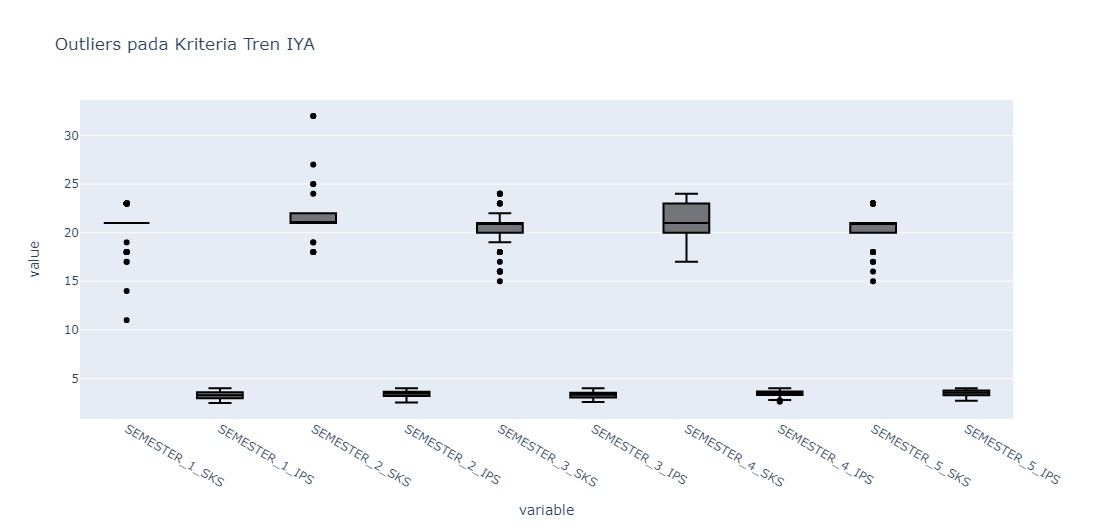

In [203]:
fig = px.box(data_frame=z[z.KRITERIA_TREN=='IYA'],color_discrete_sequence=px.colors.sequential.gray,title='Outliers pada Kriteria Tren IYA')
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

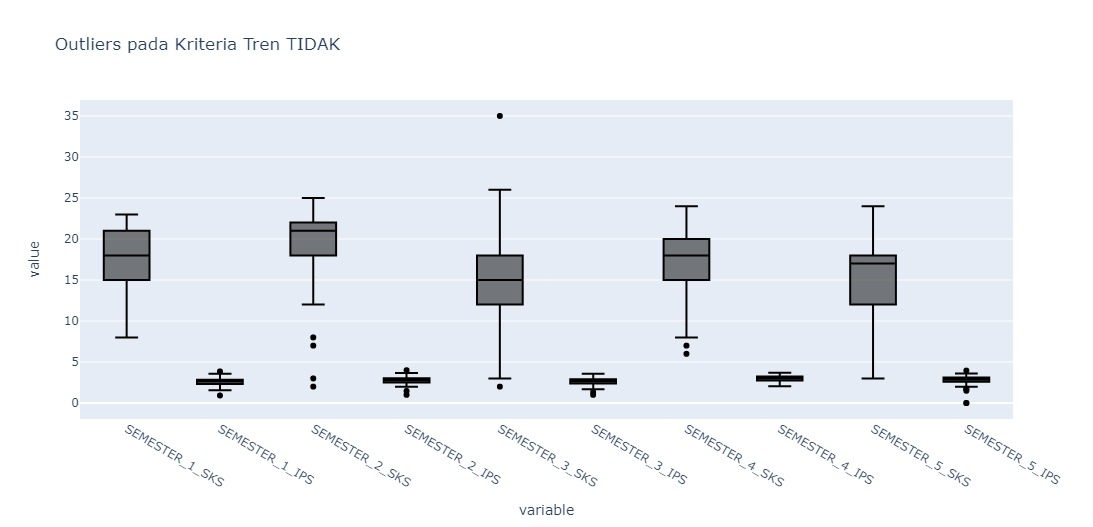

In [204]:
fig = px.box(data_frame=z[z.KRITERIA_TREN=='TIDAK'],color_discrete_sequence=px.colors.sequential.gray,title='Outliers pada Kriteria Tren TIDAK')
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(z.iloc[:,:-1], z.KRITERIA_TREN, test_size=0.3, random_state=25)

In [206]:
learning_pool = Pool(
    X_train,
    y_train,
    feature_names=list(X_train.columns)
)
valid_pool = Pool(
    X_test,
    y_test,
    feature_names=list(X_test.columns)
)
params = {
    'use_best_model':True,
    'learning_rate':0.004,
    'early_stopping_rounds':10,
    'random_strength':3
}
model = CatBoostClassifier(**params)
model.fit(learning_pool,eval_set=valid_pool,verbose=100,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6882450	test: 0.6891295	best: 0.6891295 (0)	total: 158ms	remaining: 2m 37s
100:	learn: 0.4227288	test: 0.4560512	best: 0.4560512 (100)	total: 284ms	remaining: 2.53s
200:	learn: 0.3049813	test: 0.3582312	best: 0.3582312 (200)	total: 370ms	remaining: 1.47s
300:	learn: 0.2434046	test: 0.3106768	best: 0.3106768 (300)	total: 479ms	remaining: 1.11s
400:	learn: 0.2065595	test: 0.2869153	best: 0.2869153 (400)	total: 614ms	remaining: 917ms
500:	learn: 0.1814884	test: 0.2733943	best: 0.2733612 (499)	total: 749ms	remaining: 746ms
600:	learn: 0.1649229	test: 0.2656129	best: 0.2656129 (600)	total: 819ms	remaining: 544ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.259851773
bestIteration = 688

Shrink model to first 689 iterations.


In [207]:
pd.DataFrame(model.feature_importances_,model.feature_names_,columns=['IMPORTANCE VALUES'])

,IMPORTANCE VALUES
SEMESTER_1_SKS,4.534157
SEMESTER_1_IPS,5.715625
SEMESTER_2_SKS,4.588258
SEMESTER_2_IPS,8.839307
SEMESTER_3_SKS,14.614594
SEMESTER_3_IPS,13.023304
SEMESTER_4_SKS,11.585346
SEMESTER_4_IPS,12.963906
SEMESTER_5_SKS,12.886406
SEMESTER_5_IPS,11.249096


In [208]:
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

         IYA       0.90      0.90      0.90        41
       TIDAK       0.90      0.90      0.90        42

    accuracy                           0.90        83
   macro avg       0.90      0.90      0.90        83
weighted avg       0.90      0.90      0.90        83



**TERDAPAT OUTLIERS DARI DATA**

karena kita memotong semester dari suatu mahasiswa kita tidak tahu secara mendetail apakah mahasiswa tersebut lebih dari semester 8
karena kita memprediksi pada n-semester dan kita tidak tahu informasi mengenai semester berikut2 nya

In [209]:
n_semester = 5

z = pd.DataFrame(index=o.reset_index().NIM.unique())
for i in range(1,n_semester+1):
    z[f'SEMESTER_{i}_SKS'] = ''
    z[f'SEMESTER_{i}_IPS'] = ''
for i in range(1,n_semester+1):
    for l in o.index.unique():
        try:
            z[f'SEMESTER_{i}_SKS'] = np.where(z.index==l[0],o.xs(l[0]).xs(i).SKS,z[f'SEMESTER_{i}_SKS'])
            z[f'SEMESTER_{i}_IPS'] = np.where(z.index==l[0],o.xs(l[0]).xs(i).IPS,z[f'SEMESTER_{i}_IPS'])
        except:
            z[f'SEMESTER_{i}_SKS'] = np.where(z.index==l[0],0,z[f'SEMESTER_{i}_SKS'])
            z[f'SEMESTER_{i}_IPS'] = np.where(z.index==l[0],0,z[f'SEMESTER_{i}_IPS'])
# z['TOTAL_IPK'] = z.iloc[:,1::2].mean(axis=1)
# z['TOTAL_SKS'] = z.iloc[:,:-1:2].sum(axis=1)
z['KRITERIA_TREN'] = o.reset_index()[o.reset_index().SEMESTER<=n_semester].groupby('NIM').KRITERIA_TREN.max().values

In [210]:
def check_outliers(m:pd.DataFrame):
    for tren in m.KRITERIA_TREN.unique():
        for colum in m.columns[:-1]:
            q3 = m[m.KRITERIA_TREN==tren][colum].quantile(.75)
            q1 = m[m.KRITERIA_TREN==tren][colum].quantile(.25)
            iqr = q3-q1

            lower = q1 - (1.5*iqr)
            high = q3 + (1.5*iqr)
            
            if tren == 'IYA':
                m = m[~((m.KRITERIA_TREN==tren)&(m[colum]<lower))]
            else:
                m = m[~((m.KRITERIA_TREN==tren)&(m[colum]>high))]
    return m

In [211]:
m = z.copy()
new_m = check_outliers(m)
new_m

,SEMESTER_1_SKS,SEMESTER_1_IPS,SEMESTER_2_SKS,SEMESTER_2_IPS,SEMESTER_3_SKS,SEMESTER_3_IPS,SEMESTER_4_SKS,SEMESTER_4_IPS,SEMESTER_5_SKS,SEMESTER_5_IPS,KRITERIA_TREN
8631,21,3.452381,22,3.540909,19,3.826316,24,3.579167,23,3.43913,IYA
8684,21,3.509524,22,3.504545,21,3.533333,20,3.655,20,3.31,IYA
9139,21,3.509524,22,3.722727,21,3.266667,20,3.91,20,3.955,IYA
9252,21,3.009524,22,3.254545,19,3.473684,23,3.452174,20,3.1,IYA
9253,21,3.957143,22,3.972727,21,3.928571,20,3.97,20,3.91,IYA
...,...,...,...,...,...,...,...,...,...,...,...
14110310095,20,3.005,22,3.272727,20,3.09,17,2.717647,22,3.045455,TIDAK
14110310098,23,3.252174,22,3.286364,18,2.716667,19,3.457895,17,3.294118,TIDAK
14110310101,13,2.607692,20,3.0,12,3.075,17,3.564706,17,3.064706,TIDAK
14110310102,23,2.734783,22,3.068182,11,1.690909,20,3.0,12,2.4,TIDAK


In [212]:
print(m.shape)
print(new_m.shape)

(275, 11)
(236, 11)


In [213]:
new_m.KRITERIA_TREN.value_counts()

TIDAK    135
IYA      101
Name: KRITERIA_TREN, dtype: int64

In [214]:
X_train,X_test,y_train,y_test = train_test_split(new_m.iloc[:,:-1],new_m.KRITERIA_TREN,test_size=.3,random_state=25)

learning_pool = Pool(
    X_train,
    y_train,
    feature_names=list(X_train.columns)
)
valid_pool = Pool(
    X_test,
    y_test,
    feature_names=list(X_test.columns)
)
params = {
    'use_best_model':True,
    'learning_rate':0.002,
    'early_stopping_rounds':10,
    'random_strength':3
}
model = CatBoostClassifier(**params)
model.fit(learning_pool,eval_set=valid_pool,verbose=100,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6907345	test: 0.6904432	best: 0.6904432 (0)	total: 4.24ms	remaining: 4.23s
100:	learn: 0.5100948	test: 0.5011558	best: 0.5011558 (100)	total: 162ms	remaining: 1.44s
200:	learn: 0.3902888	test: 0.3747037	best: 0.3747037 (200)	total: 297ms	remaining: 1.18s
300:	learn: 0.3070469	test: 0.2912931	best: 0.2912931 (300)	total: 411ms	remaining: 955ms
400:	learn: 0.2537031	test: 0.2366426	best: 0.2366426 (400)	total: 498ms	remaining: 744ms
500:	learn: 0.2154734	test: 0.1991374	best: 0.1991374 (500)	total: 571ms	remaining: 569ms
600:	learn: 0.1880532	test: 0.1735262	best: 0.1735262 (600)	total: 652ms	remaining: 433ms
700:	learn: 0.1666977	test: 0.1526614	best: 0.1526614 (700)	total: 830ms	remaining: 354ms
800:	learn: 0.1503304	test: 0.1376284	best: 0.1376284 (800)	total: 961ms	remaining: 239ms
900:	learn: 0.1375089	test: 0.1265733	best: 0.1265733 (900)	total: 1.06s	remaining: 116ms
999:	learn: 0.1270090	test: 0.1175120	best: 0.1175120 (999)	total: 1.13s	remaining: 0us

bestTest = 0.1

In [215]:
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

         IYA       0.93      1.00      0.96        25
       TIDAK       1.00      0.96      0.98        46

    accuracy                           0.97        71
   macro avg       0.96      0.98      0.97        71
weighted avg       0.97      0.97      0.97        71



In [216]:
pd.DataFrame(model.feature_importances_,model.feature_names_).rename(columns={0:'Feature Importance'})

,Feature Importance
SEMESTER_1_SKS,4.904319
SEMESTER_1_IPS,5.148450
SEMESTER_2_SKS,5.495648
SEMESTER_2_IPS,7.040769
SEMESTER_3_SKS,21.132042
SEMESTER_3_IPS,10.005813
SEMESTER_4_SKS,7.305443
SEMESTER_4_IPS,17.719582
SEMESTER_5_SKS,12.282200
SEMESTER_5_IPS,8.965733


In [217]:
params = {
    'use_best_model':True,
    'learning_rate':0.004,
    'early_stopping_rounds':10,
    'random_strength':3,
    'loss_function':'Logloss'
}   
learning_pool = Pool(
    m.iloc[:,:-1],
    m.KRITERIA_TREN,
    feature_names=list(m.iloc[:,:-1].columns),
)
history = cv(learning_pool,plot=True,params=params,verbose=100,nfold=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6875942	test: 0.6885393	best: 0.6885393 (0)	total: 1.28ms	remaining: 1.28s
100:	learn: 0.4093566	test: 0.4621840	best: 0.4621840 (100)	total: 123ms	remaining: 1.1s
200:	learn: 0.2865836	test: 0.3809931	best: 0.3809931 (200)	total: 204ms	remaining: 811ms
300:	learn: 0.2251028	test: 0.3528580	best: 0.3528580 (300)	total: 349ms	remaining: 811ms
400:	learn: 0.1894249	test: 0.3433109	best: 0.3431696 (398)	total: 464ms	remaining: 693ms

bestTest = 0.3412514781
bestIteration = 438

Training on fold [1/10]
0:	learn: 0.6876849	test: 0.6884541	best: 0.6884541 (0)	total: 33.6ms	remaining: 33.6s
100:	learn: 0.4285238	test: 0.4168203	best: 0.4168203 (100)	total: 241ms	remaining: 2.15s
200:	learn: 0.3071934	test: 0.3035055	best: 0.3035055 (200)	total: 575ms	remaining: 2.28s
300:	learn: 0.2436928	test: 0.2519971	best: 0.2519971 (300)	total: 794ms	remaining: 1.84s
400:	learn: 0.2078406	test: 0.2269808	best: 0.2269195 (398)	total: 957ms	remaining: 1.43s
500:	learn: 0

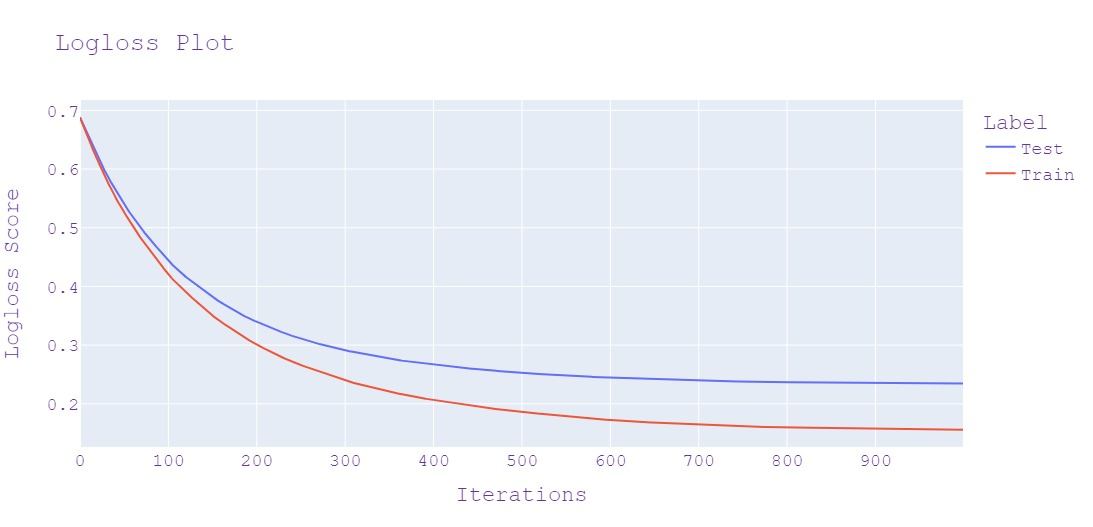

In [218]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=history['test-Logloss-mean'],name='Test'))
fig.add_trace(go.Scatter(y=history['train-Logloss-mean'],name='Train'))

fig.update_layout(
    title="Logloss Plot",
    xaxis_title="Iterations",
    yaxis_title="Logloss Score",
    legend_title="Label",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show('jpg', quality=100, scale_factor=1.5, dpi=100,height=527,width=1093)

In [219]:
history

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.688000,0.000694,0.687823,0.000283
1,1,0.684749,0.001059,0.684343,0.000345
2,2,0.680944,0.001659,0.680220,0.000641
3,3,0.677863,0.002214,0.676826,0.000694
4,4,0.674343,0.002715,0.672844,0.001122
...,...,...,...,...,...
995,995,0.234494,0.088118,0.156124,0.025564
996,996,0.234490,0.088112,0.156098,0.025596
997,997,0.234477,0.088112,0.156073,0.025625
998,998,0.234477,0.088112,0.156057,0.025645
